# Título: Global Solution - Pegada de Carbono

## Abstract

Este projeto visa investigar a relação entre a pegada de carbono e o desenvolvimento socioeconômico, com foco no Brasil e sua comparação com outras nações, incluindo os EUA e membros da OCDE. Através da análise de dados históricos (1960-2021) de emissões de CO2, população e PIB,  o estudo examina tendências temporais, correlações entre esses indicadores e o impacto de políticas climáticas. Modelos de aprendizado de máquina são empregados para prever e classificar as emissões, buscando insights para a compreensão dos impactos ambientais e o desenvolvimento de políticas públicas eficazes.  Dados da API do Banco Mundial são utilizados para enriquecer a análise e contextualizar os resultados dentro de um panorama econômico global.

---

#### Alunos:

- Nikolas Rodrigues Moura dos Santos - RM: 551566 
- Rodrigo Brasileiro - RM: 98952
- Thiago Jardim de Oliveira - RM: 551624

### Preparação e Importação de Bibliotecas

Nesta célula, serão realizadas as seguintes etapas:

1. **Importação das Bibliotecas Necessárias**:
   - **`pandas`** e **`numpy`**: Manipulação de dados e cálculos numéricos.
   - **`requests`**: Realização de requisições HTTP (se necessário para dados externos).
   - **`matplotlib.pyplot` e `seaborn`**: Criação de gráficos e visualizações.
   - **`matplotlib.ticker`**: Configuração de escala e marcadores em gráficos.
   - **`sklearn.model_selection`**: Divisão de dados em conjuntos de treino e teste.
   - **`sklearn.linear_model`** e **`sklearn.ensemble`**: Implementação de modelos de regressão linear e Random Forest.
   - **`sklearn.metrics`**: Avaliação de desempenho de modelos com métricas como erro quadrático médio (MSE) e coeficiente de determinação (R²).
   - **`statsmodels.api`**: Modelagem estatística e regressão.
   - **`sklearn.preprocessing.StandardScaler`**: Padronização de dados para modelos de machine learning.

2. **Carregamento do Dataset de Emissões de CO₂**:
   - O arquivo **`co2_emissions_kt_by_country.csv`** é carregado com a função `pd.read_csv`.
   - Este dataset contém dados sobre emissões de CO₂ (em milhares de toneladas) por país ao longo dos anos.

3. **Visualização Inicial**:
   - A função `head()` é usada para exibir as primeiras 5 linhas do dataset, permitindo uma inspeção inicial da estrutura e dos dados disponíveis.

Essas etapas configuram o ambiente e fornecem uma visão preliminar dos dados que serão utilizados na análise.


In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler  
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures

co2_df = pd.read_csv("co2_emissions_kt_by_country.csv")
co2_df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


### Etapa 2: Carregamento dos Dados de População

#### O que será feito?
1. **Carregamento do Dataset de População**:
   - O dataset **`population_total_long.csv`** será carregado utilizando a função `pd.read_csv()`.
   - Este arquivo contém dados da população total de diferentes países ao longo dos anos.

2. **Inspeção Inicial**:
   - Usaremos a função `head()` para exibir as primeiras 5 linhas do dataset.
   - Essa etapa é fundamental para garantir que os dados foram carregados corretamente e para visualizar sua estrutura inicial.

---

#### Código relacionado:
O código abaixo realiza as operações descritas:


In [4]:
pop_df = pd.read_csv("population_total_long.csv")
pop_df.head()

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


### Etapa 3: Renomeação das Colunas no Dataset de População

#### O que será feito?
1. **Criação de um Dicionário de Mapeamento**:
   - O dicionário `map` é criado para especificar os novos nomes das colunas:
     - `Country Name` será renomeado para `country_name`.
     - `Year` será renomeado para `year`.
     - `Count` será renomeado para `count`.

2. **Renomeação das Colunas**:
   - Utilizamos o método `rename()` do Pandas para aplicar o mapeamento de nomes às colunas do dataset `pop_df`.

3. **Inspeção Após Renomeação**:
   - Exibimos as primeiras 5 linhas do dataset com as colunas já renomeadas para garantir que a operação foi realizada corretamente.

---

#### Código relacionado:
O código abaixo realiza as operações descritas:


In [5]:
map = {'Country Name': 'country_name', 
       'Year': 'year',
       'Count': 'count'}

# Renomeando as colunas
pop_df = pop_df.rename(columns=map)
pop_df.head()

,country_name,year,count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411


### Etapa 4: Carregamento dos Dados do PIB

#### O que será feito?
1. **Carregamento do Dataset de PIB**:
   - O arquivo **`countries_gdp_hist.csv`** será carregado utilizando a função `pd.read_csv()`.
   - Este dataset contém informações históricas do Produto Interno Bruto (PIB) de diferentes países.
   - O parâmetro `delimiter=";"` é especificado, pois as colunas do arquivo são separadas por ponto e vírgula (`;`).

2. **Inspeção Inicial**:
   - Usamos o método `head()` para visualizar as primeiras 5 linhas do dataset e verificar se os dados foram carregados corretamente.

---

#### Código relacionado:
O código abaixo realiza as operações descritas:


In [6]:
pib_df = pd.read_csv("countries_gdp_hist.csv", delimiter=";")
pib_df.head()

,country_code,region_name,sub_region_name,intermediate_region,country_name,income_group,year,total_gdp,total_gdp_million,gdp_variation
0,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1960,0.0,0.0,0.0
1,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1961,0.0,0.0,0.0
2,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1962,0.0,0.0,0.0
3,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1963,0.0,0.0,0.0
4,ABW,Americas,Latin America and the Caribbean,Caribbean,Aruba,Ingreso alto,1964,0.0,0.0,0.0


### Pergunta 1: Como as emissões de CO2 variaram ao longo do tempo (1960-2021) para o Brasil, os EUA e a média global? Como essas variações se correlacionam com o PIB per capita e o crescimento populacional?

#### O que será feito?
1. **Filtragem dos Dados**:
   - Selecionamos as emissões de CO₂ para os países Brasil (`BRA`), Estados Unidos (`USA`) e para a média global (`WLD`) a partir do dataset `co2_df`.
   - Este filtro é realizado para que possamos visualizar as tendências específicas ao longo do tempo para esses países.

2. **Visualização Gráfica (Parte 1)**:
   - Um gráfico de linha será criado para representar as emissões de CO₂ de 1960 a 2017, comparando o Brasil, os EUA e a média global.
   - O gráfico utiliza a biblioteca `Seaborn` com o `hue='country_name'`, permitindo diferenciar os países pela legenda.

3. **Filtragem Específica (Parte 2)**:
   - Após a análise inicial, ajustamos o filtro para incluir apenas Brasil e Estados Unidos.
   - Isso possibilita um foco mais detalhado na comparação entre esses dois países.

4. **Visualização Gráfica (Parte 2)**:
   - Um segundo gráfico de linha é gerado para destacar as emissões de CO₂ do Brasil e dos EUA, ao longo do mesmo período.

---

#### Código relacionado:
O código abaixo realiza as operações descritas:


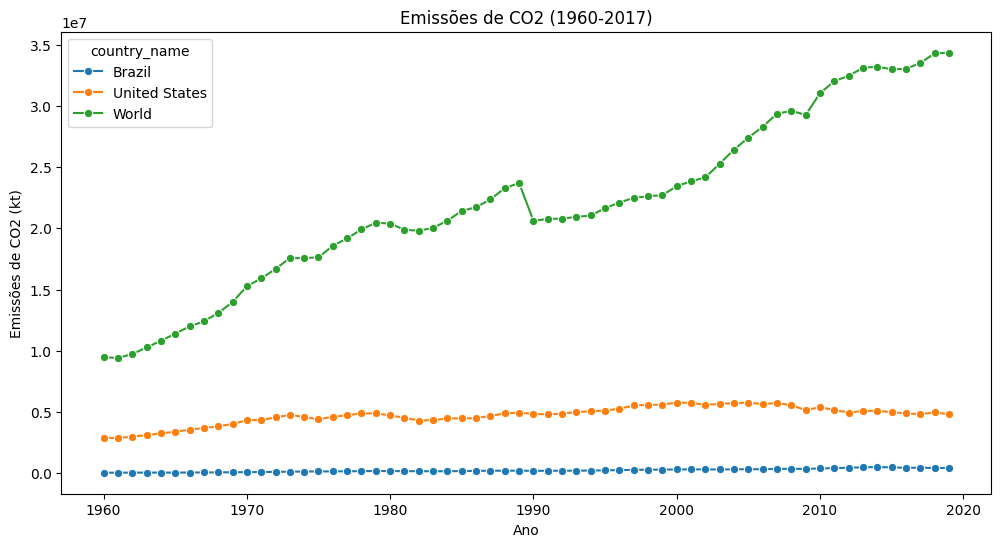

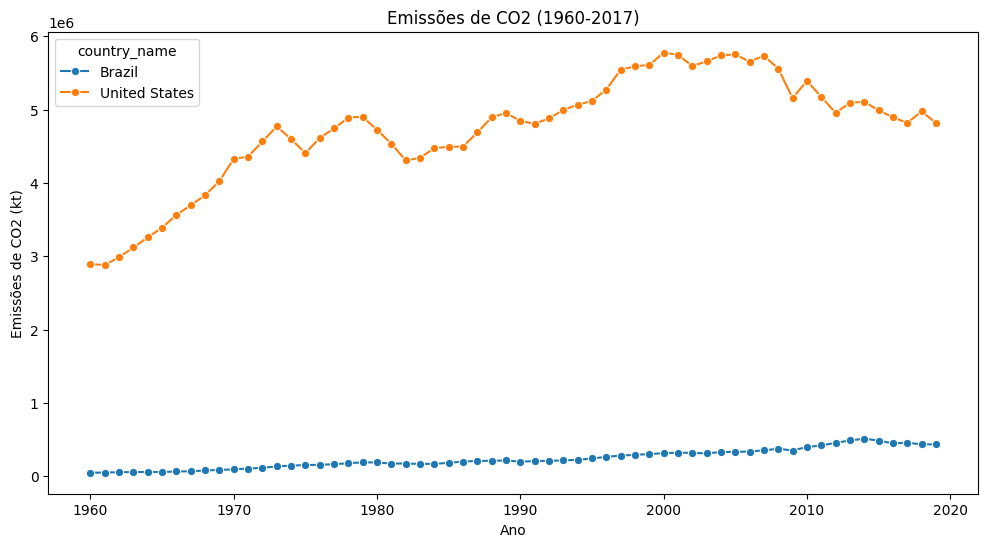

In [7]:
co2_df_Q1 = co2_df[co2_df['country_code'].isin(['BRA', 'USA', 'WLD'])]

# 4. Análise exploratória (com Markdown e Seaborn)
## Tendências ao longo do tempo
### Emissões de CO2 ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_name', data=co2_df_Q1, marker='o')
plt.title('Emissões de CO2 (1960-2017)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.show()

co2_df_Q1 = co2_df[co2_df['country_code'].isin(['BRA', 'USA'])]

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_name', data=co2_df_Q1, marker='o')
plt.title('Emissões de CO2 (1960-2017)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.show()




#### Explicação dos Gráficos
1. **Gráfico 1: Brasil, EUA e Média Global**:
   - Este gráfico mostra como as emissões de CO₂ evoluíram ao longo do tempo, destacando tendências globais e diferenças regionais.
   - Observamos que as emissões globais tiveram um aumento contínuo, enquanto o Brasil apresentou flutuações menores em comparação com os EUA, que mostraram uma estabilização nos anos mais recentes.

2. **Gráfico 2: Brasil e EUA**:
   - Este gráfico compara diretamente as emissões de CO₂ entre Brasil e EUA.
   - Podemos perceber que os EUA têm emissões muito superiores ao Brasil, mas uma tendência de estabilização e leve declínio após 2005, enquanto o Brasil mantém emissões relativamente constantes.

Essas visualizações ajudam a compreender como os padrões de emissões diferem entre países desenvolvidos e em desenvolvimento, e estabelecem uma base para analisar correlações com PIB per capita e crescimento populacional.

---

### Continuação da Pergunta 1:

#### O que será feito?

1. **Limpeza de Dados**:
   - Remoção de linhas com valores ausentes (`NaN`) nos datasets de emissões de CO₂, população e PIB.
   - Garantimos que as colunas `country_code` e `year` estão no formato `string` para facilitar o cruzamento de dados.

2. **Padronização**:
   - Ajustamos o nome "United States of America" no dataset de PIB para "United States", alinhando-o aos demais datasets.

3. **Filtragem de Dados**:
   - Selecionamos apenas os dados relacionados ao Brasil e aos EUA nos datasets de população e PIB.

4. **Mesclagem de Dados**:
   - Os datasets de população e PIB são combinados com base no nome do país (`country_name`) e no ano (`year`), criando um único dataset consolidado.

5. **Cálculo do PIB Per Capita**:
   - Calculamos o PIB per capita dividindo o PIB total pela população total de cada país para cada ano.

6. **Visualização do PIB Per Capita**:
   - Criamos um gráfico de linha que representa o PIB per capita do Brasil e dos EUA entre 1960 e 2017.
   - Configuramos os ticks do eixo X para intervalos de 10 anos, facilitando a leitura das tendências ao longo do tempo.

---

#### Código relacionado:
O código abaixo realiza as operações descritas:


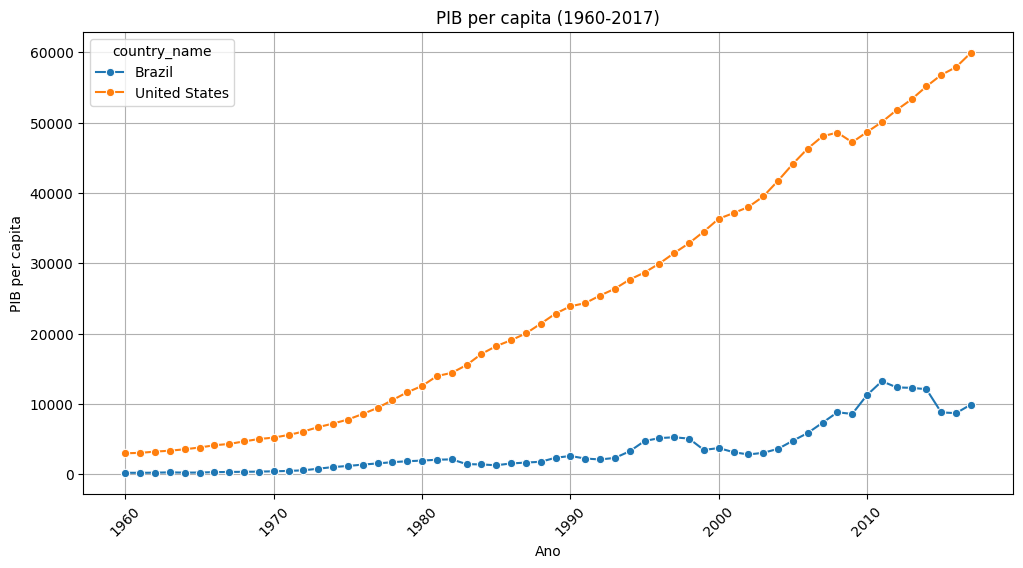

In [8]:
# 3. Preparar os dados
## Limpeza 
co2_df = co2_df.dropna()
pop_df = pop_df.dropna()
pib_df = pib_df.dropna()

# 1. Certifique-se de que 'country_code' e 'year' são do tipo string em ambos os DataFrames
pop_df['country_name'] = pop_df['country_name'].astype(str)
pop_df['year'] = pop_df['year'].astype(str)
pib_df['country_code'] = pib_df['country_code'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)

# Renomeando dados dos EUA no dataframe de PIB para estar condizente com os outros dataframes
pib_df['country_name'] = pib_df['country_name'].replace('United States of America', 'United States')

#filtrando dados de população e PIB do Brasil e dos EUA
pop_df_bra_usa = pop_df[pop_df['country_name'].isin(['Brazil', 'United States'])]
pib_df_bra_usa = pib_df[pib_df['country_code'].isin(['BRA', 'USA'])]

# 2. Mesclar os DataFrames com base no código do país e no ano
merged_df = pd.merge(pib_df_bra_usa, pop_df_bra_usa, left_on=['country_name', 'year'], right_on=['country_name', 'year'], how='inner')

# 3. Calcular o PIB per capita (igual ao seu código)
merged_df['gdp_per_capita'] = merged_df['total_gdp'] / merged_df['count']
merged_df['gdp_per_capita'] = pd.to_numeric(merged_df['gdp_per_capita'], errors='coerce')
merged_df['year'] = merged_df['year'].astype(int) # Converte 'year' para numérico

# 4. Criar o gráfico com os ticks de 10 em 10 anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='gdp_per_capita', hue='country_name', data=merged_df, marker='o')
plt.title('PIB per capita (1960-2017)')
plt.xlabel('Ano')
plt.ylabel('PIB per capita')


# Configurar os ticks do eixo x
ax = plt.gca() # Obter o eixo atual
ax.xaxis.set_major_locator(ticker.MultipleLocator(10)) # Define intervalos de 10 anos

plt.xticks(rotation=45)
plt.grid(True)
plt.show()



#### Explicação do Gráfico:
O gráfico apresenta a evolução do PIB per capita do Brasil e dos Estados Unidos entre 1960 e 2017. 

1. **Tendências Observadas**:
   - O PIB per capita dos EUA apresenta um crescimento contínuo e acentuado durante todo o período.
   - O Brasil exibe uma trajetória mais instável, com crescimento moderado e alguns períodos de estabilidade ou declínio, notadamente nas décadas de 1980 e 1990.

2. **Interpretação Econômica**:
   - A diferença nas trajetórias reflete fatores econômicos, políticos e sociais:
     - **EUA**: Economia madura com forte inovação e investimentos.
     - **Brasil**: Momentos de instabilidade econômica, crises e períodos de baixa produtividade.

Essas tendências econômicas influenciam diretamente o consumo de recursos naturais e, consequentemente, as emissões de CO₂ de cada país.


### Continuação da Pergunta 1:

#### O que será feito?

1. **Conversão do Tipo de Dados da Coluna `year`**:
   - Certificamos que a coluna `year` no dataset de população possui valores do tipo inteiro. Isso é essencial para análises temporais e para plotar os dados corretamente no gráfico.

2. **Criação do Gráfico**:
   - Um gráfico de linha será gerado para visualizar o crescimento populacional do Brasil e dos Estados Unidos entre 1960 e 2021.
   - Os valores de população de ambos os países são plotados ao longo do tempo.

3. **Configuração do Eixo X**:
   - Ajustamos os ticks do eixo X para exibição em intervalos de 10 anos, melhorando a legibilidade.
   - Aplicamos uma rotação nos rótulos dos anos para evitar sobreposição.

4. **Adição de Títulos e Labels**:
   - O gráfico inclui título, rótulos nos eixos e uma grade para facilitar a leitura e interpretação.

---

#### Código relacionado:
O código abaixo realiza as operações descritas:


        country_name  year      count
26            Brazil  1960   72179226
202    United States  1960  180671000
242           Brazil  1961   74311343
418    United States  1961  183691000
458           Brazil  1962   76514328
...              ...   ...        ...
12145  United States  2015  320742673
12185         Brazil  2016  206163058
12363  United States  2016  323071342
12403         Brazil  2017  207833831
12581  United States  2017  325147121

[116 rows x 3 columns]


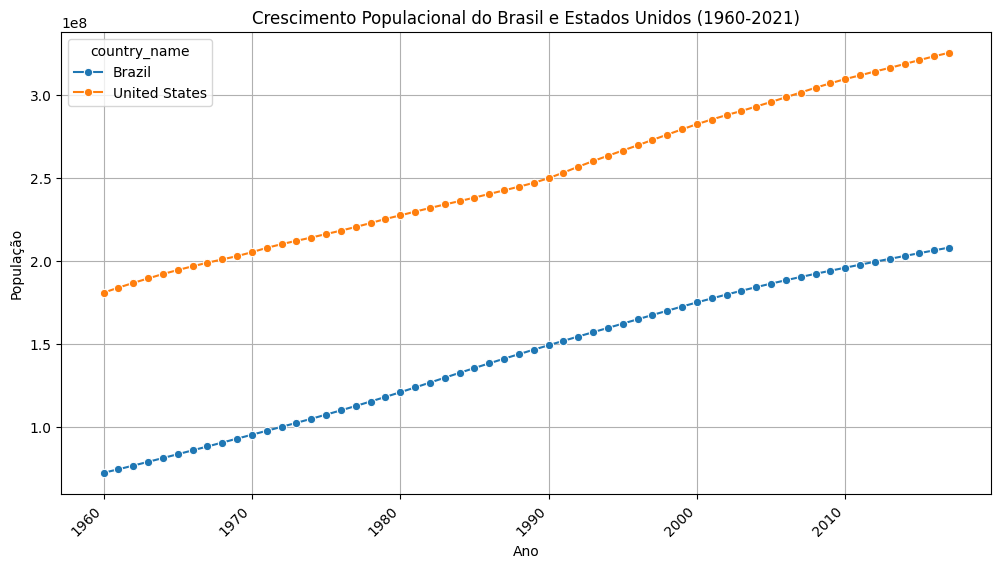

In [9]:

print(pop_df_bra_usa)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='count', hue='country_name', data=pop_df_bra_usa, marker='o')


ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation=45, ha='right') # Opcional: rotacionar os labels

# 4. Adicionar título e labels
plt.title('Crescimento Populacional do Brasil e Estados Unidos (1960-2021)')
plt.xlabel('Ano')
plt.ylabel('População')
plt.grid(True) 
plt.show()


#### Explicação do Gráfico:
O gráfico apresenta a evolução da população do Brasil e dos Estados Unidos entre 1960 e 2021.

1. **Tendências Observadas**:
   - Ambos os países mostram crescimento populacional contínuo durante o período analisado.
   - O Brasil apresenta uma taxa de crescimento mais acentuada nas décadas de 1960 a 1980, enquanto nos EUA o crescimento é mais constante e menos expressivo.

2. **Interpretação Demográfica**:
   - **Brasil**: A maior taxa de crescimento nas décadas de 1960 a 1980 reflete um período de transição demográfica, com altas taxas de natalidade.
   - **EUA**: O crescimento populacional mais lento reflete um maior controle de natalidade e políticas migratórias.

3. **Características Gráficas**:
   - Os marcadores a cada 10 anos ajudam a identificar padrões por década.
   - A linha contínua reflete a evolução anual da população.


---


### Continuação da Pergunta 1:
#### O que será feito?

1. **Filtragem e Mesclagem de Dados**:
   - O conjunto de dados de CO₂ será filtrado para conter apenas os dados até o ano de 2017, alinhando-os com os dados de PIB per capita e população.
   - Em seguida, os dados de CO₂ serão combinados com os dados de PIB e população, criando um conjunto de dados consolidado para análise.

2. **Regressão Linear**:
   - Será aplicado um modelo de regressão linear para analisar a relação entre as emissões de CO₂ e as variáveis independentes (PIB per capita e crescimento populacional).
   - O modelo será ajustado para cada país de interesse e as métricas de desempenho, como R-quadrado e erro quadrático médio (MSE), serão exibidas.
   
3. **Divisão dos Dados em Treino e Teste**:
   - A divisão dos dados em conjuntos de treino e teste será realizada de forma temporal (sem embaralhamento), para garantir que as previsões sejam feitas com base em dados futuros.

4. **Visualização dos Resultados**:
   - Será gerado um gráfico com a linha de regressão e as previsões feitas pelo modelo.
   - As previsões serão destacadas em vermelho sobre o gráfico de dispersão.

---

#### Código relacionado:
O código abaixo realiza as operações descritas:


Resultados da Regressão para Brazil:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     346.5
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.09e-24
Time:                        20:56:01   Log-Likelihood:                -444.09
No. Observations:                  40   AIC:                             894.2
Df Residuals:                      37   BIC:                             899.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const  

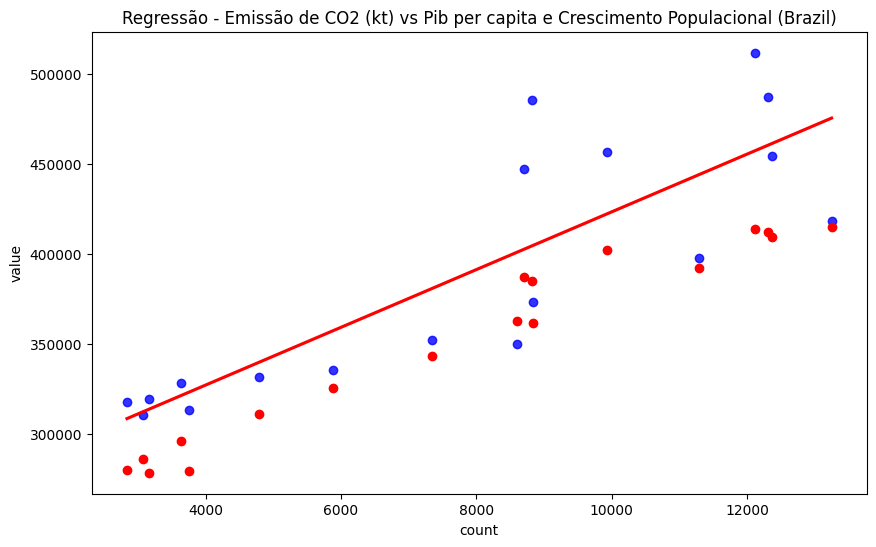

Métricas para Brazil:
R-quadrado: 0.9493204117966049
MSE: 96482342763.56976
Resultados da Regressão para United States:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     253.8
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           2.49e-22
Time:                        20:56:01   Log-Likelihood:                -542.40
No. Observations:                  40   AIC:                             1091.
Df Residuals:                      37   BIC:                             1096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

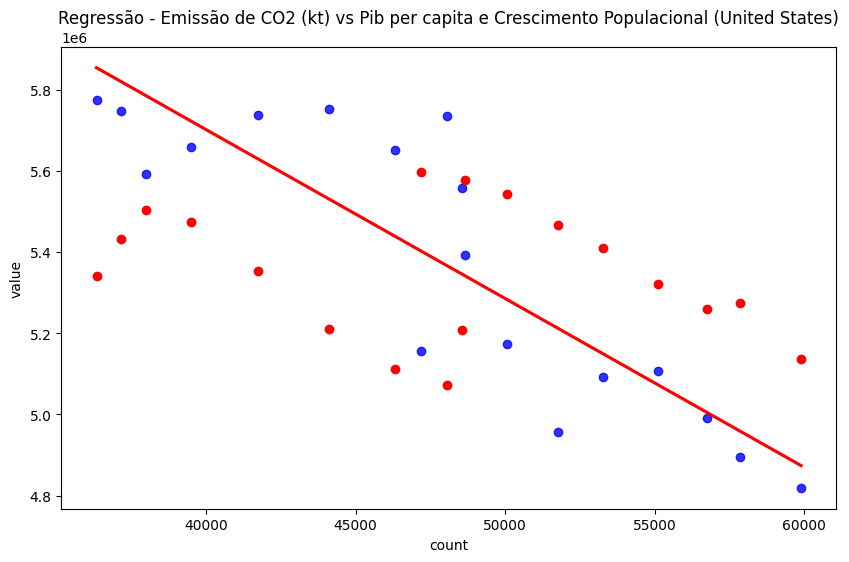

Métricas para United States:
R-quadrado: 0.9320514380473207
MSE: 9634982879716.898


In [10]:

co2_df_until_2017 = co2_df[co2_df['year'] <= 2017]
merged_df_with_co2 = pd.merge(merged_df, co2_df_until_2017, left_on=['country_code', 'country_name', 'year'], right_on=['country_code', 'country_name','year'], how='inner')

def regress(X, y, country_name, test_size=0.3):
    """Ajusta um modelo de regressão linear e exibe resultados e gráficos."""

    #Divisão de treino e teste para séries temporais
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)


    X_train = sm.add_constant(X_train)  
    model = sm.OLS(y_train, X_train).fit() 



    print(f"Resultados da Regressão para {country_name}:")
    print(model.summary())

    #Fazer previsões para os dados de teste
    X_test = sm.add_constant(X_test)
    predictions = model.predict(X_test)


    # Gráfico dos resultados (Seaborn)
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X_test.iloc[:,1], y=y_test, data=merged_df_with_co2, ci=None, line_kws={"color": "red"}, scatter_kws={"color":"blue"}) 
    plt.scatter(X_test.iloc[:, 1], predictions, color='red')  
    plt.title(f'Regressão - Emissão de CO2 (kt) vs Pib per capita e Crescimento Populacional ({country_name})') 
    plt.xlabel(X.columns[1]) 
    plt.ylabel(y.name) 
    plt.show()

    return model

for country in merged_df_with_co2['country_name'].unique(): #loop para regressão por país
    country_df = merged_df_with_co2[merged_df_with_co2['country_name'] == country].copy()
    
    X = country_df[['gdp_per_capita', 'count']] 
    y = country_df['value'] 
    
    model = regress(X, y, country)
    
   
    print(f"Métricas para {country}:")
    print(f"R-quadrado: {model.rsquared}")
    print(f"MSE: {model.mse_model}")
   

#### Explicação do Modelo de Regressão:
Este trecho de código aplica um modelo de regressão linear para analisar a relação entre as emissões de CO₂ e duas variáveis independentes: o PIB per capita e o crescimento populacional (representado pela variável `count`).

1. **Ajuste do Modelo**:
   - O modelo de regressão linear é ajustado para cada país individualmente.
   - A variável dependente é a emissão de CO₂ (`value`), enquanto as variáveis independentes são o PIB per capita (`gdp_per_capita`) e a população (`count`).

2. **Divisão em Treino e Teste**:
   - A divisão dos dados é feita de forma temporal, sem embaralhamento, para garantir que as previsões feitas pelo modelo sejam baseadas em dados futuros.

3. **Visualização dos Resultados**:
   - O gráfico gerado exibe a linha de regressão (em vermelho) que melhor se ajusta aos dados de teste. As previsões feitas pelo modelo são representadas em vermelho sobre o gráfico de dispersão, com os dados reais sendo mostrados em azul.
   - O modelo também gera um resumo com estatísticas como o **R-quadrado** e o **MSE** (Erro Quadrático Médio), que ajudam a avaliar a qualidade do ajuste do modelo.

4. **Interpretação**:
   - **R-quadrado**: Mede a proporção da variação na variável dependente que é explicada pelo modelo. Um valor próximo de 1 indica que o modelo tem um bom ajuste.
   - **MSE**: Quanto menor o valor, melhor é a precisão das previsões.

Esses resultados permitem compreender a força e a direção das relações entre as emissões de CO₂ e os fatores econômicos e demográficos (PIB per capita e crescimento populacional) para cada país analisado.

---


### Pergunta 2: Comparação da Pegada de Carbono do Brasil com a Média Global, América Latina, América do Norte e Países da OCDE (1990-2021)

#### Objetivo:
A análise busca comparar as emissões de CO₂ do Brasil com as médias da América Latina e Caribe (LCN), América do Norte (NAC), países da OCDE (OED) e a média global (WLD) entre 1990 e 2021. O gráfico gerado e os valores das emissões médias anuais ajudarão a observar como o Brasil se posiciona em relação a essas regiões e identificar os principais fatores responsáveis pelas diferenças nas emissões.

#### O que será feito?

1. **Carregamento e Preparação dos Dados**:
   - O conjunto de dados de emissões de CO₂ é carregado e a coluna 'year' é convertida para o tipo numérico para facilitar o filtro de anos.
   - Filtra-se o período de 1990 a 2021, considerando as emissões anuais para as regiões de interesse: Brasil, América Latina e Caribe, América do Norte, OCDE e Mundo.

2. **Cálculo das Emissões Médias Anuais**:
   - Para cada país e região, as emissões médias anuais de CO₂ entre 1990 e 2021 são calculadas.
   
3. **Visualização das Emissões**:
   - É gerado um gráfico de linha mostrando as emissões médias anuais de CO₂ ao longo do tempo para o Brasil, América Latina, América do Norte, OCDE e o Mundo.

4. **Cálculo das Médias**:
   - As médias de emissões de CO₂ para cada país/região no período de 1990 a 2021 são calculadas e exibidas.

---

#### Código relacionado:
O código abaixo carrega e processa os dados, gera o gráfico e calcula as médias das emissões de CO₂:


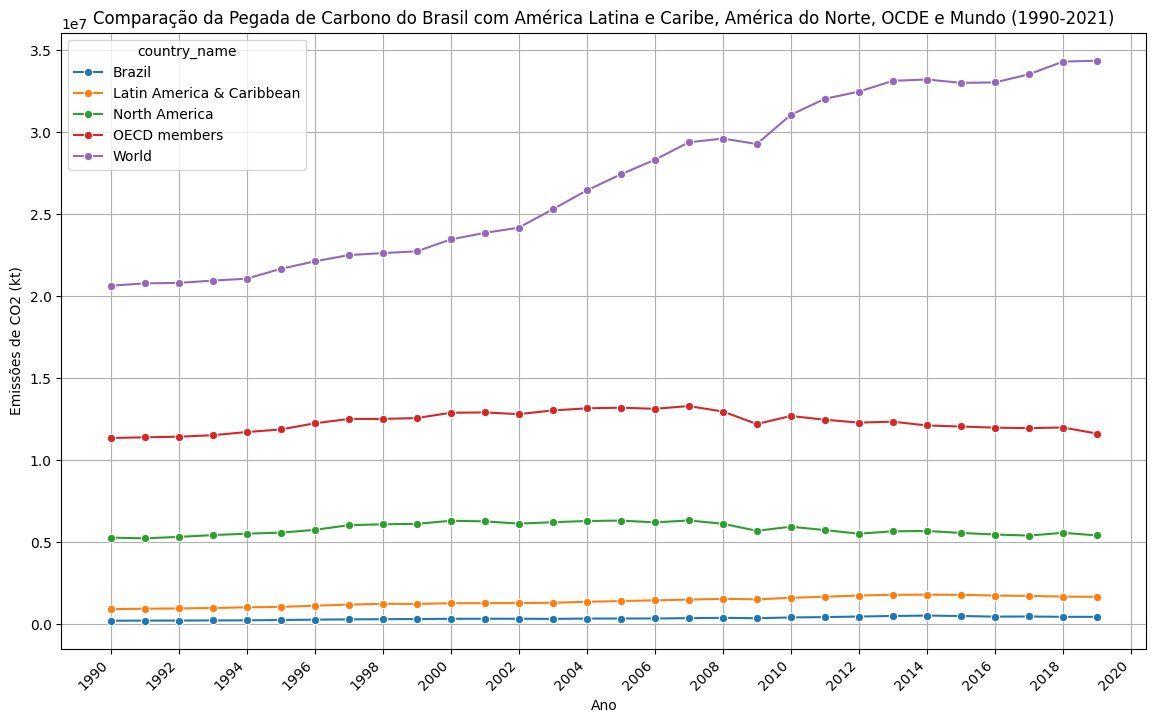

Média de Emissões de CO2 do Brasil (1990-2021): 342845.00 kt
Média de Emissões de CO2 da América Latina e Caribe (1990-2021): 1381924.48 kt
Média de Emissões de CO2 da América do Norte (1990-2021): 5793732.65 kt
Média de Emissões de CO2 da OCDE (1990-2021): 12329160.34 kt
Média de Emissões de CO2 do Mundo (1990-2021): 27096629.03 kt


In [11]:
co2_df['year'] = pd.to_numeric(co2_df['year'], errors='coerce')

# Filtrar os dados para o período de 1990 a 2021
co2_df_90_21 = co2_df[(co2_df['year'] >= 1990) & (co2_df['year'] <= 2021)]

# Selecionar os países/regiões de interesse
countries = ['BRA', 'LCN', 'NAC', 'OED', 'WLD']  
co2_df_regions = co2_df_90_21[co2_df_90_21['country_code'].isin(countries)]

# Calcular as emissões médias anuais por país/região
mean_emissions = co2_df_regions.groupby(['country_code', 'country_name', 'year'])['value'].mean().reset_index()

# Plotar as emissões médias de CO2 ao longo do tempo
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='value', hue='country_name', data=mean_emissions, marker='o')

# Configura os ticks do eixo x 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))  # Define intervalos de 2 anos
plt.xticks(rotation=45, ha='right')  


plt.title('Comparação da Pegada de Carbono do Brasil com América Latina e Caribe, América do Norte, OCDE e Mundo (1990-2021)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.grid(True)
plt.show()


# Calcular e exibir as médias de emissões para cada país/região no período
media_brasil = mean_emissions[mean_emissions['country_code'] == 'BRA']['value'].mean()
media_america_lc = mean_emissions[mean_emissions['country_code'] == 'LCN']['value'].mean()
media_america_nc = mean_emissions[mean_emissions['country_code'] == 'NAC']['value'].mean() #Adicionado Norte
media_oecd = mean_emissions[mean_emissions['country_code'] == 'OED']['value'].mean()
media_mundo = mean_emissions[mean_emissions['country_code'] == 'WLD']['value'].mean()


print(f"Média de Emissões de CO2 do Brasil (1990-2021): {media_brasil:.2f} kt")
print(f"Média de Emissões de CO2 da América Latina e Caribe (1990-2021): {media_america_lc:.2f} kt")
print(f"Média de Emissões de CO2 da América do Norte (1990-2021): {media_america_nc:.2f} kt") #Adicionado Norte
print(f"Média de Emissões de CO2 da OCDE (1990-2021): {media_oecd:.2f} kt")
print(f"Média de Emissões de CO2 do Mundo (1990-2021): {media_mundo:.2f} kt")


#### Análise dos Resultados:

O gráfico acima exibe a evolução das emissões de CO₂ para o Brasil em comparação com outras regiões do mundo entre 1990 e 2021. A linha de cada região mostra a tendência das emissões ao longo do tempo.

- **Brasil vs. Mundo**: As emissões do Brasil são significativamente menores do que a média global, refletindo fatores como sua maior dependência de fontes de energia renováveis e a presença de vastas florestas tropicais que agem como sumidouros de carbono.
  
- **Brasil vs. América Latina e Caribe**: A comparação com a América Latina e Caribe revela um comportamento semelhante, com o Brasil apresentando emissões mais baixas em comparação com alguns países da região que dependem mais de fontes de energia não renováveis.

- **Brasil vs. América do Norte**: As emissões do Brasil são muito menores do que as da América do Norte, especialmente dos EUA, que possuem uma economia fortemente dependente de combustíveis fósseis e uma estrutura industrial intensiva em carbono.

- **Brasil vs. OCDE**: O Brasil apresenta emissões bem abaixo da média dos países da OCDE, que são mais industrializados e têm economias mais avançadas, com maior consumo de energia e, consequentemente, maiores emissões.

#### Fatores que Contribuem para as Diferenças:

- **Matriz Energética**: Países com maior dependência de combustíveis fósseis, como os EUA e países da OCDE, tendem a ter emissões de CO₂ mais altas, enquanto países como o Brasil, com maior uso de energias renováveis, apresentam emissões mais baixas.

- **Industrialização**: Países mais industrializados geralmente têm maiores níveis de emissão devido ao consumo intensivo de energia para produção. O Brasil, com sua economia predominantemente agrícola e de serviços, tem emissões menores por unidade de PIB.

- **Desmatamento**: Embora o Brasil tenha feito avanços na redução das emissões, o desmatamento ainda representa um fator significativo para as emissões de CO₂, especialmente na Amazônia.

- **Políticas Ambientais**: As políticas ambientais, como os compromissos de redução de emissões no Acordo de Paris, têm um impacto direto nas emissões de CO₂. Países da OCDE, por exemplo, adotaram medidas mais rigorosas para reduzir suas pegadas de carbono.

- **Crescimento Econômico**: O crescimento econômico, especialmente em países com economias emergentes, pode resultar em aumento das emissões à medida que há mais industrialização e consumo de energia, como observado na comparação do Brasil com a América Latina.

---


### Pergunta 3: No período entre 1990 e 2019, como a trajetória das emissões de CO2 do Brasil se compara à dos EUA? As mudanças no PIB e na população explicam as diferenças nas tendências de emissões entre os dois países? Esta questão foca na comparação direta entre Brasil e EUA, dois grandes países com diferentes níveis de desenvolvimento e perfis de emissões.

#### Objetivo:
Esta questão visa comparar as trajetórias das emissões de CO₂ do Brasil e dos Estados Unidos entre 1990 e 2019. A análise investiga se as mudanças no PIB e na população explicam as diferenças nas tendências de emissões entre os dois países, que possuem níveis de desenvolvimento e perfis de emissões distintos.

#### O que será feito?

1. **Carregamento e Preparação dos Dados**:
   - O período de 1990 a 2019 foi selecionado para análise.
   - Os dados de CO₂, PIB e população para Brasil e EUA são filtrados para o período de interesse.
   - A população é transformada em variável de crescimento percentual para capturar variações anuais.

2. **Visualização das Emissões de CO₂**:
   - Um gráfico de linha é gerado para mostrar as emissões de CO₂ de ambos os países ao longo do tempo (1990-2019).

3. **Regressão Linear**:
   - Uma regressão linear é realizada para entender como o PIB per capita e o crescimento populacional influenciam as emissões de CO₂.
   - O modelo de regressão é ajustado separadamente para Brasil e EUA.

4. **Interpretação dos Resultados**:
   - A análise dos coeficientes de regressão ajuda a entender o impacto do PIB per capita e do crescimento populacional nas emissões de CO₂ em cada país.
   - O R-quadrado e outras métricas são usadas para avaliar a qualidade do ajuste do modelo.




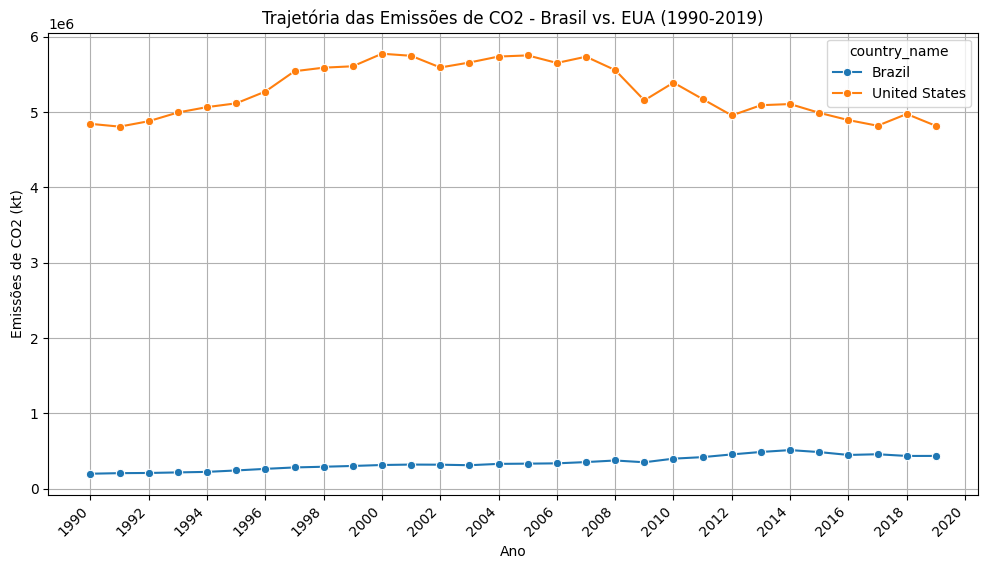

Index(['country_name', 'year', 'count', 'pop_growth'], dtype='object')
Index(['country_code', 'region_name', 'sub_region_name', 'intermediate_region',
       'country_name', 'income_group', 'year', 'total_gdp',
       'total_gdp_million', 'gdp_variation', 'count', 'gdp_per_capita',
       'value'],
      dtype='object')
Resultados da Regressão para BRA:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     40.83
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           1.33e-08
Time:                        20:56:16   Log-Likelihood:                -339.13
No. Observations:                  28   AIC:                             684.3
Df Residuals:                      25   BIC:                             688.3
Df Model:   

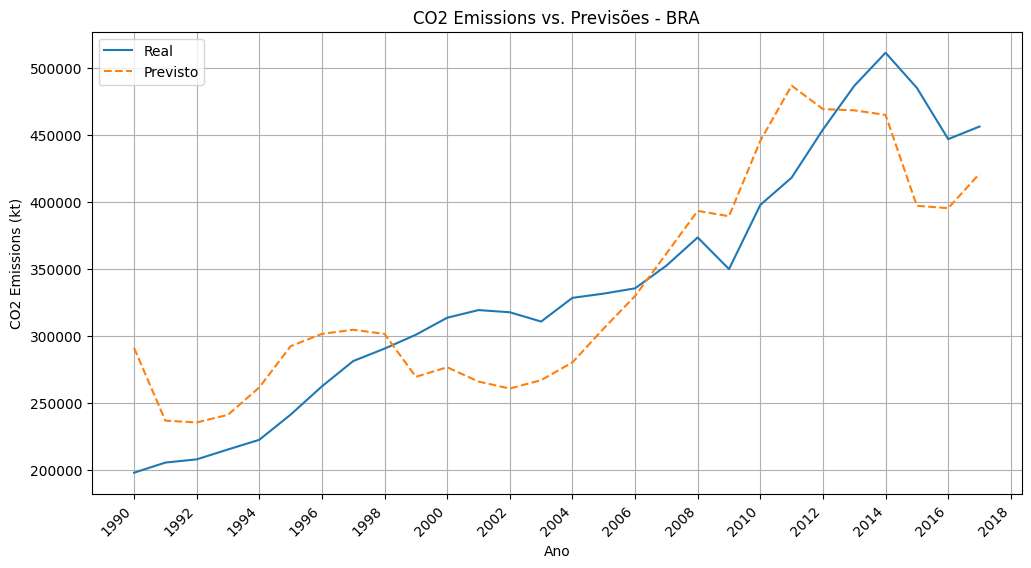

0.7656192952577925
Resultados da Regressão para USA:
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7235
Date:                Fri, 22 Nov 2024   Prob (F-statistic):              0.495
Time:                        20:56:16   Log-Likelihood:                -395.42
No. Observations:                  28   AIC:                             796.8
Df Residuals:                      25   BIC:                             800.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

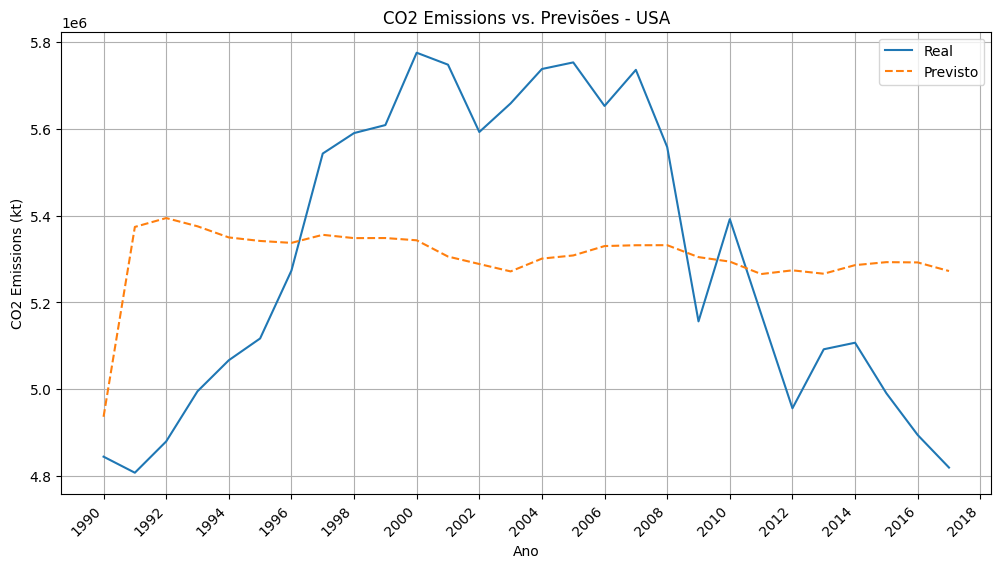

0.05471286456530278


In [12]:
# Filtrar para o período 1990-2019
start_year = 1990
end_year = 2019

co2_df['year'] = co2_df['year'].astype(int)
pop_df['year'] = pop_df['year'].astype(int)
pib_df['year'] = pib_df['year'].astype(int)

co2_df_1990_2019 = co2_df[(co2_df['year'] >= start_year) & (co2_df['year'] <= end_year)]
pop_df_1990_2019 = pop_df[(pop_df['year'] >= start_year) & (pop_df['year'] <= end_year)]
pib_df_1990_2019 = pib_df[(pib_df['year'] >= start_year) & (pib_df['year'] <= end_year)]

# Converter 'year' para string para a mesclagem
pop_df['year'] = pop_df['year'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)



# Padronizar os dados (StandardScaler)
scaler = StandardScaler()


# Criando os dataframes para a regressão
co2_df_selected = co2_df_1990_2019[co2_df_1990_2019['country_code'].isin(['BRA', 'USA'])]
pop_df_selected = pop_df_1990_2019[pop_df_1990_2019['country_name'].isin(['Brazil', 'United States'])]
pib_df_selected = pib_df_1990_2019[pib_df_1990_2019['country_code'].isin(['BRA', 'USA'])]

# Criando o gráfico das emissões
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='country_name', data=co2_df_selected, marker='o')

# Ajustando os ticks do eixo x para melhor visualização (de 2 em 2 anos)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
plt.xticks(rotation=45, ha='right')

plt.title(f'Trajetória das Emissões de CO2 - Brasil vs. EUA ({start_year}-{end_year})')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (kt)')
plt.grid(True)
plt.show()


merged_df = pd.merge(pib_df_selected, pop_df_selected, left_on=['country_name', 'year'], right_on=['country_name', 'year'])


# Calcular o PIB per capita
merged_df['gdp_per_capita'] = merged_df['total_gdp'] / merged_df['count']


# Converter 'year' para inteiro para o statsmodels
merged_df['year'] = merged_df['year'].astype(int)

# Criando um novo dataframe mesclando co2 e os dados populacionais e PIB per capita
merged_df_with_co2 = pd.merge(merged_df, co2_df_selected, on=['country_code', 'country_name','year'])


# Calcular a variação anual da população
pop_growth = pop_df_selected.copy()
pop_growth = pop_growth[pop_growth['country_name'].isin(['Brazil', 'United States'])]
pop_growth['pop_growth'] = pop_growth.groupby('country_name')['count'].pct_change() * 100  # Variação percentual
pop_growth['year'] = pop_growth['year'].astype(int)
print(pop_growth.columns)
print(merged_df_with_co2.columns)
merged_df_with_co2 = pd.merge(merged_df_with_co2, pop_growth[['country_name', 'year', 'pop_growth']], on=['country_name', 'year'], how='left')


for country in merged_df_with_co2['country_code'].unique():
    country_df = merged_df_with_co2[merged_df_with_co2['country_code'] == country].copy()

    # Prepara as variáveis para a regressão
    X = country_df[['gdp_per_capita', 'pop_growth']] # PIB per capita e crescimento populacional
    X = sm.add_constant(X)  # Adiciona a constante para o intercepto
    y = country_df['value']

    X = X.fillna(0)
    # Ajuste o modelo de regressão
    model = sm.OLS(y, X).fit()

    # Imprime o resultado da regressão
    print(f"Resultados da Regressão para {country}:")
    print(model.summary())

    # Faz as previsões (opcional, para visualização)
    y_pred = model.predict(X)

    # Plota os resultados (incluindo os valores reais e previstos)
    plt.figure(figsize=(12, 6))
    plt.plot(country_df['year'], y, label='Real')
    plt.plot(country_df['year'], y_pred, label='Previsto', linestyle='--')
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2)) # Define intervalos de 2 anos
    plt.xticks(rotation=45, ha='right') # Opcional: rotacionar os labels
    plt.title(f'CO2 Emissions vs. Previsões - {country}')
    plt.xlabel('Ano')
    plt.ylabel('CO2 Emissions (kt)')
    plt.legend()
    plt.grid(True)
    plt.show()


    print(model.rsquared)



### Observações sobre o Gráfico de Emissões de CO₂ - Brasil vs. EUA (1990-2019)

- **Brasil**: O gráfico mostra que as emissões de CO₂ do Brasil, embora em crescimento ao longo do período, permanecem em níveis significativamente mais baixos do que as dos EUA. Isso é indicativo de um perfil energético mais limpo, com uma maior dependência de fontes renováveis de energia (hidrelétricas, por exemplo) e uma indústria com menor intensidade de carbono em comparação aos EUA. A tendência de aumento das emissões está ligada ao crescimento da população e à expansão de alguns setores industriais, mas de forma menos acentuada do que nos EUA.

- **EUA**: As emissões de CO₂ dos EUA apresentam uma trajetória bem mais alta, com um pico notável nas décadas de 1990 e 2000. O gráfico reflete a alta dependência de fontes fósseis de energia, como carvão e petróleo, e uma economia altamente industrializada, fatores que historicamente contribuem para níveis elevados de emissões. Embora as emissões tenham começado a desacelerar após 2005, devido a políticas energéticas e ao aumento da eficiência, os EUA continuam com uma pegada de carbono muito mais alta do que o Brasil.

- **Comparação**: 
  - **Diferenças no perfil energético**: O Brasil, com sua matriz energética predominantemente renovável, tem uma pegada de carbono bem mais baixa que os EUA, cujas emissões são fortemente impulsionadas pela utilização de combustíveis fósseis.
  - **Evolução das emissões**: Ambas as nações mostraram um aumento nas emissões durante os anos 1990 e 2000, embora o ritmo tenha sido mais moderado no Brasil. O Brasil também experimentou menos flutuação nas emissões ao longo do tempo, enquanto os EUA tiveram picos mais pronunciados.
  - **Impacto das políticas**: As emissões dos EUA começaram a cair após a década de 2000, em grande parte devido ao aumento da eficiência energética e à transição gradual para energias mais limpas. O Brasil, apesar de alguns desafios relacionados ao desmatamento e mudanças na indústria, manteve uma tendência de crescimento controlado.

- **Implicações**:
  - A diferença nas emissões de CO₂ entre os dois países é um reflexo de suas diferenças em termos de **industrialização**, **matriz energética** e **estratégias de desenvolvimento econômico**.
  - As emissões no Brasil são influenciadas por políticas de preservação ambiental e pelo uso mais intenso de fontes de energia renováveis, enquanto nos EUA as emissões são impulsionadas pela indústria e pelo alto consumo de energia fóssil.
---

### Continuação da pergunta 3:

**Objetivo:**  
O objetivo desta seção é descrever o processo de preparação dos dados, execução da regressão, e geração dos gráficos de comparação entre as **emissões reais** e as **emissões previstas** para os países selecionados (Brasil e EUA).

#### Etapas para Gerar o Gráfico:

1. **Conversão e Preparação dos Dados:**
   - A coluna `year` foi convertida para o formato de string em todos os dataframes (PIB, população e CO₂) para garantir uma mesclagem correta.
   - **Mescla dos Dados:** Os dataframes de PIB, população e emissões de CO₂ foram combinados com base nas colunas comuns `country_name` e `year`, utilizando `pd.merge`.
   
2. **Cálculo de PIB per Capita:**
   - O **PIB per capita** foi calculado dividindo o **PIB total** pela **população**. Foram feitas verificações para garantir que não houvesse divisão por zero.

3. **Cálculo de Crescimento Populacional:**
   - O **crescimento populacional** foi calculado utilizando a variação percentual da população de um ano para o outro.

4. **Tratamento de Valores Inconsistentes:**
   - Valores infinitos (resultantes de divisões por zero) foram substituídos por `NaN` para garantir que a padronização e a regressão funcionassem corretamente.

5. **Divisão Treino/Teste e Padronização:**
   - O dataset foi dividido em conjuntos de treino e teste, com 80% dos dados para treino e 20% para teste.
   - A padronização foi realizada nas variáveis numéricas utilizando o `StandardScaler`, para garantir que todas as variáveis estivessem na mesma escala.

6. **Modelo de Regressão:**
   - Um modelo de regressão linear foi ajustado para prever as emissões de CO₂ com base no **PIB per capita** e **crescimento populacional**.
   - O modelo foi treinado com os dados de treino, e as previsões foram feitas para o conjunto de teste.

7. **Avaliação do Modelo:**
   - **Métricas de Avaliação:** Foram calculadas o **MSE (Erro Quadrático Médio)** e o **R² (coeficiente de determinação)** para avaliar o desempenho do modelo.

8. **Geração do Gráfico de Emissões:**
   - O gráfico exibe as **emissões reais** e as **emissões previstas** de CO₂ ao longo do tempo. O gráfico ajuda a comparar as emissões observadas com as estimadas pelo modelo.
   - O eixo X representa o **ano**, enquanto o eixo Y representa as **emissões de CO₂** (em kilotoneladas).
   - Para melhorar a legibilidade, o eixo X foi ajustado para exibir as marcas de ano a cada 2 anos.
   

Resultados da Regressão para BRA (Treino):
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     16.20
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           7.83e-05
Time:                        20:56:29   Log-Likelihood:                -263.05
No. Observations:                  22   AIC:                             532.1
Df Residuals:                      19   BIC:                             535.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

C:\Users\rodri\AppData\Local\Temp\ipykernel_9024\3581459845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_selected['year'] = pop_df_selected['year'].astype(str)
C:\Users\rodri\AppData\Local\Temp\ipykernel_9024\3581459845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_df_selected['year'] = pib_df_selected['year'].astype(str)
C:\Users\rodri\AppData\Local\Temp\ipykernel_9024\3581459845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

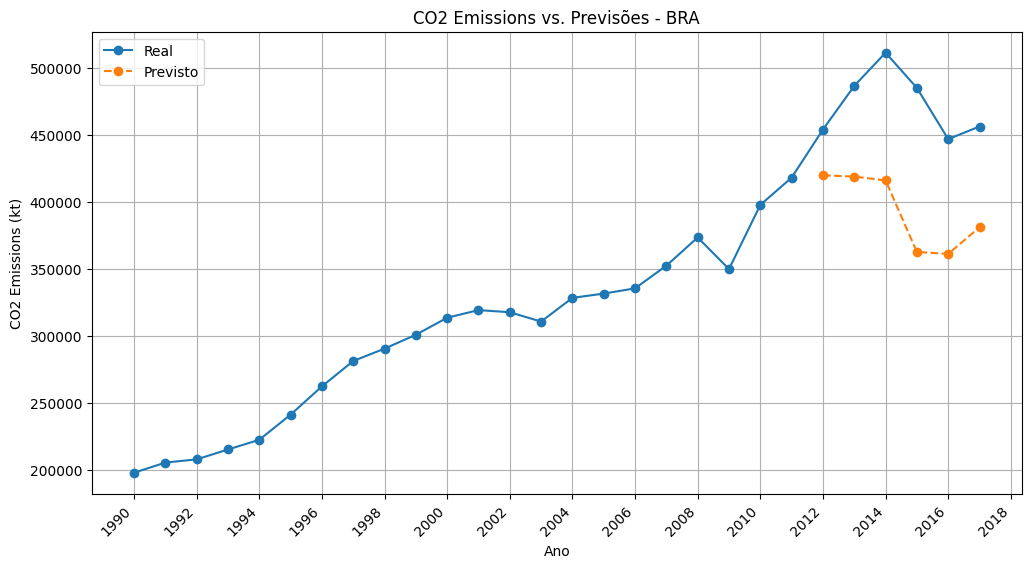

Resultados da Regressão para USA (Treino):
                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     5.527
Date:                Fri, 22 Nov 2024   Prob (F-statistic):             0.0128
Time:                        20:56:29   Log-Likelihood:                -305.37
No. Observations:                  22   AIC:                             616.7
Df Residuals:                      19   BIC:                             620.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

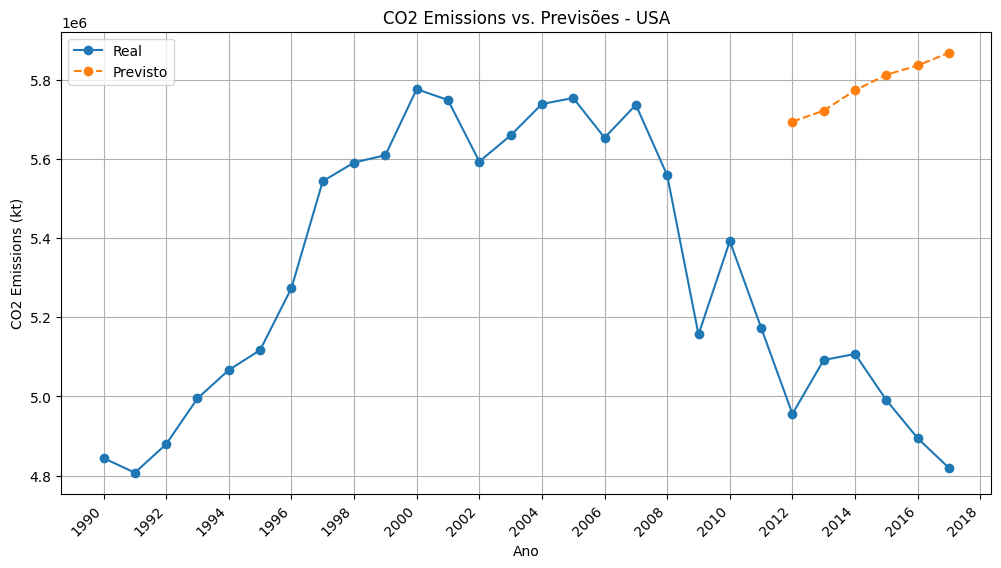

In [13]:
# Converter 'year' para string ANTES da mescla para evitar problemas
pop_df_selected['year'] = pop_df_selected['year'].astype(str)
pib_df_selected['year'] = pib_df_selected['year'].astype(str)
co2_df_selected['year'] = co2_df_selected['year'].astype(str)


# Mesclar os dataframes de PIB e população
merged_df = pd.merge(pib_df_selected, pop_df_selected, on=['country_name', 'year'], how='inner')




# Calcular o PIB per capita, tratando possíveis divisões por zero
merged_df['gdp_per_capita'] = merged_df['total_gdp'] / merged_df['count'].replace(0, np.nan)  # Substitui 0 por NaN para evitar divisão por zero

# Criando um novo dataframe mesclando co2 e os dados populacionais e PIB per capita
merged_df_with_co2 = pd.merge(merged_df, co2_df_selected, on=['country_code', 'country_name', 'year'], how='inner')
# Converter 'year' para inteiro para o statsmodels
merged_df_with_co2['year'] = merged_df_with_co2['year'].astype(int)


# Adicionando os dados de crescimento populacional, tratando valores infinitos
pop_growth = pop_df_selected.copy()
pop_growth['pop_growth'] = pop_growth.groupby('country_name')['count'].pct_change() * 100  # Variação percentual

# Converter 'year' para inteiro para a mesclagem
pop_growth['year'] = pop_growth['year'].astype(int)

# Corrigindo o merge para usar 'left' e evitar perda de dados
merged_df_with_co2 = pd.merge(merged_df_with_co2, pop_growth[['country_name', 'year', 'pop_growth']], on=['country_name', 'year'], how='left')

# Substituindo infinitos por NaN para que o StandardScaler funcione
merged_df_with_co2.replace([np.inf, -np.inf], np.nan, inplace=True)


# Padronizar os dados APÓS o tratamento de NaN e a divisão treino/teste
numerical_cols = ['gdp_per_capita', 'pop_growth', 'value']  # Colunas a serem padronizadas
scaler = StandardScaler()


# Loop da regressão com divisão treino/teste e tratamento de NaN
for country in merged_df_with_co2['country_code'].unique():
    country_df = merged_df_with_co2[merged_df_with_co2['country_code'] == country].copy().reset_index(drop=True)


    # Prepara as variáveis para a regressão, tratando valores NaN em 'gdp_per_capita'
    X = country_df[['gdp_per_capita', 'pop_growth']].fillna(0)  # Substitui NaN por 0 ou outro valor adequado
    y = country_df['value']

    # Divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


    # Padronização dos dados (apenas numéricas)
    X_train[numerical_cols[:-1]] = scaler.fit_transform(X_train[numerical_cols[:-1]]) #padroniza as variáveis preditoras numéricas
    X_test[numerical_cols[:-1]] = scaler.transform(X_test[numerical_cols[:-1]]) #padroniza as variáveis preditoras numéricas

    # Adiciona a constante APÓS a divisão treino/teste e o StandardScaler
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)


    # Ajuste o modelo de regressão apenas com os dados de TREINO
    model = sm.OLS(y_train, X_train).fit()

    # Imprime o resultado da regressão para o treino
    print(f"Resultados da Regressão para {country} (Treino):")
    print(model.summary())



    # Faz as previsões para o conjunto de TESTE
    y_pred = model.predict(X_test)

    # Avaliação do modelo no conjunto de teste
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Métricas de Avaliação para {country} (Teste):")
    print(f"MSE: {mse}")
    print(f"R-quadrado: {r2}")
    print("-" * 30)


    # Plota os resultados (incluindo os valores reais e previstos)
    plt.figure(figsize=(12, 6))
    plt.plot(country_df['year'], country_df['value'], label='Real', marker='o') #plota os dados reais do dataframe completo

    # Plota as previsões apenas para o conjunto de teste
    plt.plot(country_df.iloc[X_test.index]['year'], y_pred, label='Previsto', linestyle='--', marker='o')
    plt.title(f'CO2 Emissions vs. Previsões - {country}')
    plt.xlabel('Ano')
    plt.ylabel('CO2 Emissions (kt)')
    plt.legend()

    # Ajustando os ticks do eixo x para melhor visualização (de 2 em 2 anos)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
    plt.xticks(rotation=45, ha='right') 

    plt.grid(True)
    plt.show()
    

### Análise do Gráfico

A análise a seguir discute a interpretação dos gráficos gerados a partir das **emissões reais** e das **emissões previstas** pelo modelo de regressão, com foco na comparação entre os países Brasil e EUA.

#### Emissões Reais vs. Emissões Previstase:
- No gráfico, a **linha sólida** representa as **emissões reais** de CO₂ ao longo do tempo para o país, enquanto a **linha pontilhada** mostra as **emissões previstas** pelo modelo de regressão.
- Se o modelo estiver bem ajustado, as **linhas real e prevista** devem estar próximas, indicando que o modelo conseguiu capturar a tendência das emissões de CO₂.

#### Ajuste do Modelo:
- O gráfico também pode ser usado para avaliar visualmente o **ajuste do modelo**, comparando a linha de previsões com os dados reais.
- Caso o modelo tenha um **bom R²**, espera-se ver uma **boa concordância** entre os valores reais e as previsões, ou seja, as duas linhas deverão estar próximas.

#### Comportamento das Emissões ao Longo do Tempo:
- A análise das emissões de CO₂ pode revelar tendências como **crescimento constante**, **estabilidade** ou **redução** ao longo do tempo.
- As **diferenças entre os dois países** podem ser observadas, com o Brasil e os EUA apresentando comportamentos distintos devido a fatores como matriz energética, políticas públicas e industrialização.

#### Métricas de Avaliação:
- **MSE (Erro Quadrático Médio):** Mede a diferença média entre os valores reais e previstos. Quanto menor o MSE, melhor o modelo.
- **R² (Coeficiente de Determinação):** Indica a proporção da variação das emissões de CO₂ explicada pelas variáveis no modelo. Valores mais próximos de 1 indicam um bom ajuste do modelo.

#### Conclusões a partir da Análise:
- **Brasil:** Se o modelo no gráfico para o Brasil mostrar boas previsões (próximas aos dados reais), isso indicaria que as variáveis selecionadas (PIB per capita e crescimento populacional) têm um papel importante nas emissões de CO₂ no Brasil.
- **EUA:** No caso dos EUA, a análise pode indicar uma maior ou menor correlação dependendo de como o modelo lida com as características econômicas e populacionais do país.
- **Comparação entre os Países:** A comparação das **linhas de previsões** pode revelar como o modelo lida com as diferenças de perfil econômico e populacional entre os dois países.

---

### Pergunta 4 - Analisando os dados globais de 1960 a 2021, existe uma correlação entre a variação anual do PIB e a variação anual das emissões de CO2? Esta correlação se mantém consistente ao longo do tempo e em diferentes grupos de renda?

### Objetivo:

Este trecho de código tem como objetivo analisar a **correlação entre a variação anual do PIB** e a **variação anual das emissões de CO2** de 1960 a 2021, considerando diferentes grupos de renda. 

#### O que será feito?

1. **Preparação e limpeza dos dados:**
   - A coluna `gdp_variation` do DataFrame `pib_df` é limpa para garantir que não contenha valores inválidos, substituindo valores infinitos (positivos ou negativos) por `NaN`.
   - O mesmo processo é aplicado aos dados de emissões de CO2, substituindo valores infinitos por `NaN` na coluna `value` do DataFrame `co2_df`.
   - As colunas `year` de `pop_df`, `pib_df` e `co2_df` são convertidas para o tipo `str` para facilitar a mesclagem posterior.

2. **Mesclagem dos DataFrames:**
   - Os DataFrames `pib_df` e `co2_df` são mesclados com base nas colunas `country_code` e `year` usando o método `merge()`. O resultado é um novo DataFrame `merged_df` contendo informações tanto do PIB quanto das emissões de CO2 para cada país e ano.

3. **Cálculo da variação anual de CO2:**
   - A variação anual das emissões de CO2 (`co2_variation`) é calculada utilizando a função `pct_change()`, que calcula a variação percentual entre os valores consecutivos de `value` para cada país.
   - Valores infinitos resultantes desse cálculo também são substituídos por `NaN`, e as linhas com valores `NaN` são removidas.

4. **Cálculo da correlação geral:**
   - A correlação entre a variação do PIB (`gdp_variation`) e a variação das emissões de CO2 (`co2_variation`) é calculada para todo o conjunto de dados. O valor da correlação é impresso na tela.

5. **Análise por grupo de renda:**
   - O código analisa a correlação separadamente para cada grupo de renda presente na coluna `income_group`.
   - Para cada grupo de renda, é verificado se há dados suficientes (mais de uma linha) para calcular a correlação. Caso contrário, é exibida uma mensagem informando que não há dados suficientes.
   - A correlação é calculada e impressa para cada grupo de renda.

6. **Geração de gráficos (Scatter Plots):**
   - São gerados gráficos de dispersão (scatter plots) para visualizar a relação entre a variação do PIB e a variação das emissões de CO2 para cada grupo de renda.
   - Os gráficos são configurados com limites consistentes nos eixos para facilitar a comparação entre os grupos.
   - O gráfico para cada grupo de renda inclui:
     - O título indicando a relação entre as variáveis e o grupo de renda.
     - Eixos `x` e `y` representando a variação do PIB e a variação das emissões de CO2, respectivamente.
     - Os pontos de dados representando a relação entre a variação do PIB e a variação das emissões de CO2.


Correlação geral entre variação do PIB e variação de CO2: 0.04
Correlação para o grupo de renda 'Ingreso alto': 0.02
Correlação para o grupo de renda 'Países de ingreso bajo': 0.03
Correlação para o grupo de renda 'Países de ingreso mediano bajo': 0.09
Correlação para o grupo de renda 'Ingreso mediano alto': 0.10
Correlação para o grupo de renda 'No clasificado': 0.12


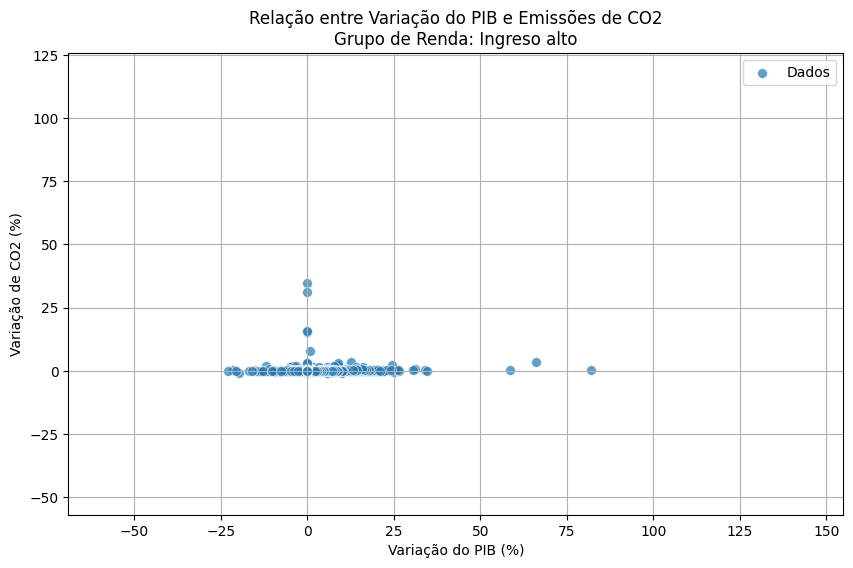

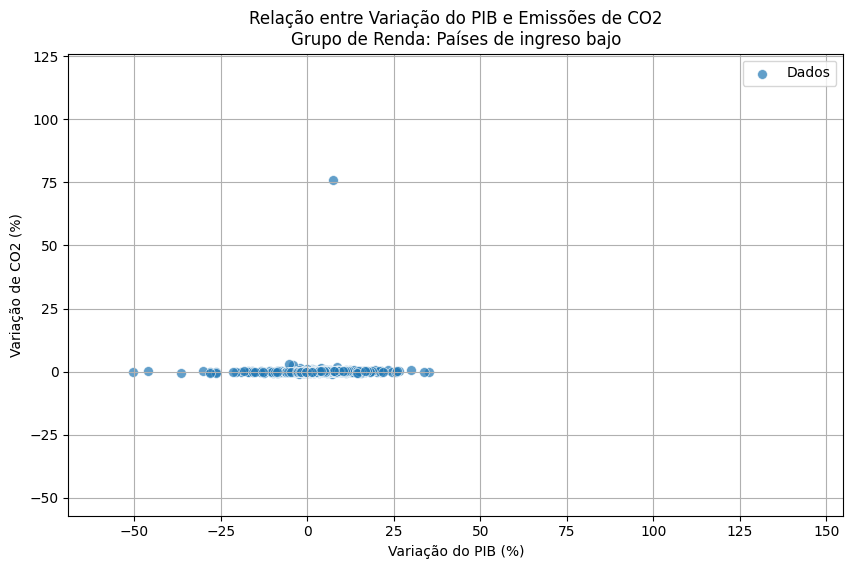

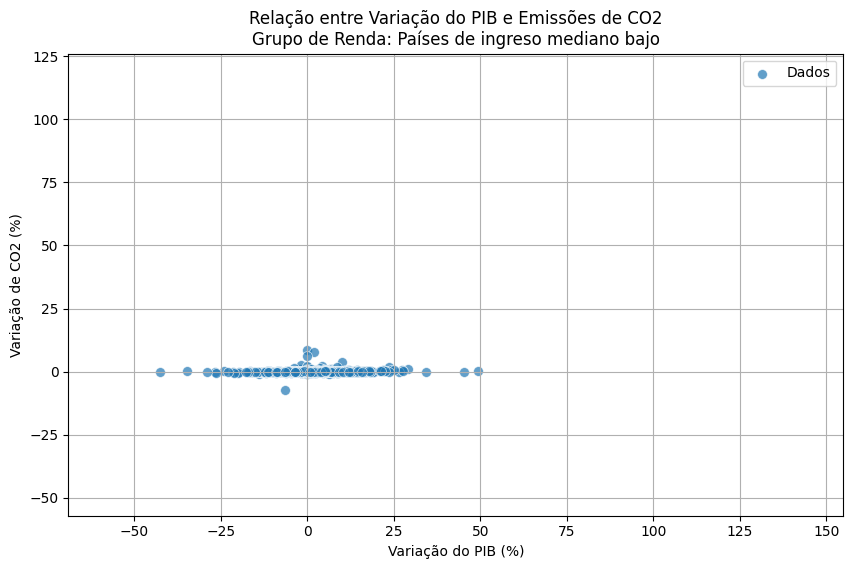

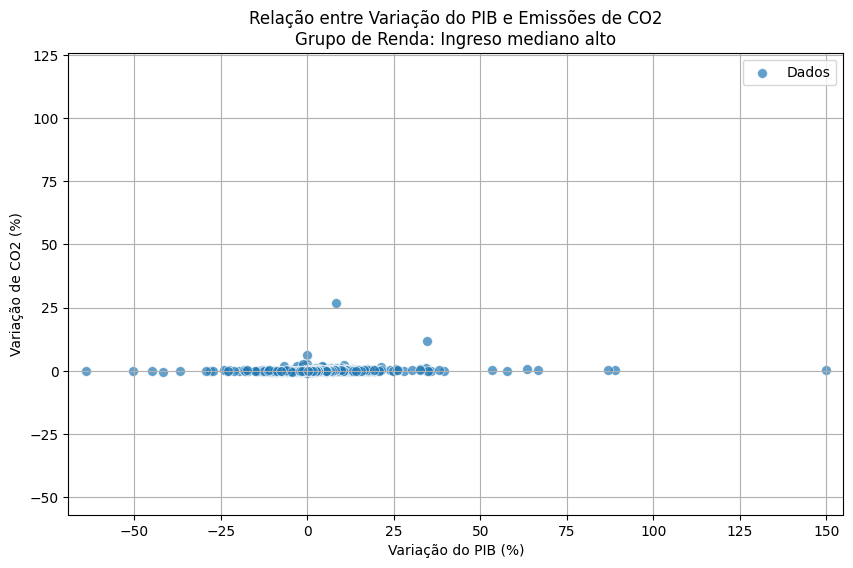

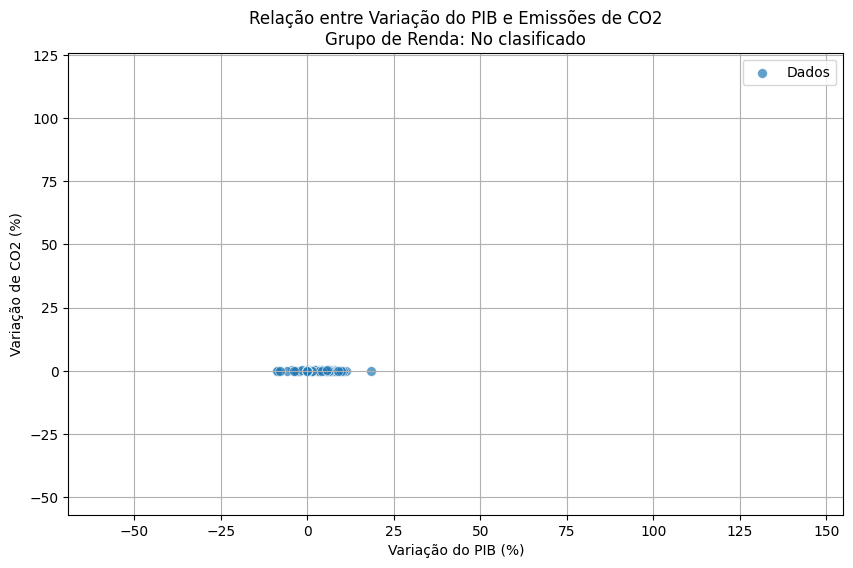

In [14]:
# Garantir que a coluna `gdp_variation` não tenha valores inválidos
pib_df['gdp_variation'] = pib_df['gdp_variation'].replace([np.inf, -np.inf], np.nan)

# Filtrar dados válidos para emissões de CO2
co2_df['value'] = co2_df['value'].replace([np.inf, -np.inf], np.nan)

# Converter 'year' para string ANTES da mescla para evitar problemas
pop_df['year'] = pop_df['year'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)
co2_df['year'] = co2_df['year'].astype(str)

# Mesclar os datasets de PIB e CO2 com base no país e ano
merged_df = pd.merge(pib_df, co2_df, on=['country_code', 'year'], how='inner')

# Garantir que as colunas necessárias estejam completas
merged_df = merged_df.dropna(subset=['gdp_variation', 'value'])

# Calcular a variação anual das emissões de CO2
merged_df['co2_variation'] = merged_df.groupby('country_code')['value'].pct_change()
merged_df['co2_variation'] = merged_df['co2_variation'].replace([np.inf, -np.inf], np.nan)

# Remover linhas onde `co2_variation` seja NaN após o cálculo
merged_df = merged_df.dropna(subset=['co2_variation'])

# Correlação geral
correlation_general = merged_df['gdp_variation'].corr(merged_df['co2_variation'])
print(f"Correlação geral entre variação do PIB e variação de CO2: {correlation_general:.2f}")

# Análise por grupo de renda
income_groups = merged_df['income_group'].unique()
for group in income_groups:
    df_group = merged_df[merged_df['income_group'] == group]

    if df_group.shape[0] > 1:
        # Verificar variação nos dados
        if df_group['gdp_variation'].std() == 0 or df_group['co2_variation'].std() == 0:
            print(f"Dados constantes no grupo de renda '{group}', correlação não definida.")
            continue

        # Calcular correlação
        corr = df_group['gdp_variation'].corr(df_group['co2_variation'])
        print(f"Correlação para o grupo de renda '{group}': {corr:.2f}")
    else:
        print(f"Dados insuficientes para calcular a correlação no grupo '{group}'.")


# Definir limites consistentes para os eixos (opcional)
xmin = merged_df['gdp_variation'].min() - 5  # Adicionar uma margem de 5%
xmax = merged_df['gdp_variation'].max() + 5
ymin = merged_df['co2_variation'].min() - 50  # Adicionar uma margem de 50%
ymax = merged_df['co2_variation'].max() + 50

# Gerar scatter plots para cada grupo de renda
income_groups = merged_df['income_group'].unique()

for group in income_groups:
    df_group = merged_df[merged_df['income_group'] == group]

    if not df_group.empty:  # Certificar que há dados para o grupo
        plt.figure(figsize=(10, 6))
        
        # Scatter plot 
        sns.scatterplot(x='gdp_variation', y='co2_variation', data=df_group, alpha=0.7, s=50, label="Dados")
        
        
        # Títulos e legendas
        plt.title(f'Relação entre Variação do PIB e Emissões de CO2\nGrupo de Renda: {group}')
        plt.xlabel('Variação do PIB (%)')
        plt.ylabel('Variação de CO2 (%)')
        
        # Limites dos eixos
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        
        plt.grid(True)
        plt.legend()
        plt.show()


### Análise da Correlação entre Variação do PIB e Variação das Emissões de CO2

#### Correlação Geral:
- A correlação entre a **variação anual do PIB** e a **variação anual das emissões de CO2** foi calculada para o conjunto completo de dados. A **correlação geral** indica o grau de associação entre as duas variáveis em nível global.
- Um valor positivo da correlação sugeriria que, à medida que o PIB cresce, as emissões de CO2 também tendem a aumentar. Um valor negativo indicaria uma relação inversa.

#### Correlação por Grupo de Renda:
- A análise foi dividida por **grupo de renda**, permitindo observar se a relação entre PIB e emissões de CO2 varia entre países de diferentes níveis econômicos.
- Para cada grupo de renda, a **correlação entre as variações do PIB e CO2** foi calculada. Dependendo dos resultados, pode-se perceber que países de **renda alta** podem apresentar uma correlação mais forte (ou diferente) comparados a países de **renda baixa**.
  
#### Visualização dos Gráficos:
- Os **scatter plots** gerados fornecem uma representação visual da relação entre a variação do PIB e a variação das emissões de CO2 para cada grupo de renda.
- Em cada gráfico, a **distribuição dos pontos** pode indicar se existe uma tendência clara entre as duas variáveis. Se houver uma relação forte, os pontos formarão uma linha ou um padrão claro; caso contrário, a dispersão será mais aleatória. 

---


### Pergunta 5 - Globalmente, de 1960 a 2017, o crescimento populacional impulsiona o aumento das emissões de CO2 per capita? Existem diferenças regionais ou por nível de renda nessa relação?

### Objetivo da Pergunta:
O objetivo dessa análise é verificar se existe uma correlação entre o **crescimento populacional** e o **aumento das emissões de CO2 per capita** globalmente, de 1960 a 2017. Além disso, o código busca explorar se existem **diferenças regionais ou por nível de renda** na relação entre essas duas variáveis.

#### O que será feito?:

1. **Tratamento de valores ausentes e conversão de anos:**
   - As colunas `year` dos DataFrames `co2_df`, `pop_df` e `pib_df` são convertidas para o tipo `int` após garantir que qualquer valor não numérico seja tratado e removido. Os valores ausentes nas colunas são excluídos para evitar que afetem as análises subsequentes.

2. **Mesclagem dos DataFrames:**
   - Os DataFrames de **emissões de CO2**, **população** e **PIB** são mesclados com base nas colunas `country_name` e `year` para formar o DataFrame `merged_df`, contendo os dados de todas as variáveis relevantes para cada país e ano.

3. **Cálculo das emissões de CO2 per capita:**
   - A **emissão de CO2 per capita** é calculada dividindo as emissões totais de CO2 (`value`) pela população (`count`), resultando em uma métrica ajustada ao tamanho da população de cada país.

4. **Cálculo do crescimento populacional anual:**
   - O **crescimento populacional** anual é calculado usando a função `pct_change()`, que calcula a variação percentual na população de um ano para o outro. A primeira linha de cada país (que não tem um valor anterior para calcular a variação) é excluída.

5. **Correlação global:**
   - A correlação entre o **crescimento populacional** e as **emissões de CO2 per capita** é calculada globalmente para todos os países, utilizando a função `corr()` do Pandas.

6. **Padronização dos dados:**
   - Para garantir que as variáveis sejam comparáveis, os dados de **crescimento populacional** e **emissões de CO2 per capita** são padronizados utilizando o `StandardScaler` do Scikit-learn.

7. **Gráfico de dispersão global:**
   - Um gráfico de dispersão (scatter plot) é gerado para mostrar a relação entre o crescimento populacional e as emissões de CO2 per capita, colorido por **região** (através do parâmetro `hue`). Esse gráfico permite observar visualmente a correlação entre as variáveis, considerando as diferentes regiões.

8. **Correlação por região:**
   - A correlação entre crescimento populacional e emissões de CO2 per capita é calculada para cada **região** do mundo, e os resultados são impressos. Isso permite avaliar se a relação varia entre diferentes áreas geográficas.

9. **Gráfico de dispersão por região:**
   - Para cada região, um gráfico de dispersão similar ao global é gerado, com o parâmetro `hue` representando a região. Isso ajuda a visualizar se a relação entre as variáveis é consistente ou varia dependendo da região.

10. **Correlação por grupo de renda:**
   - A correlação entre o crescimento populacional e as emissões de CO2 per capita também é calculada para cada **grupo de renda**. O grupo de renda é utilizado como uma variável categórica para investigar se há diferenças significativas na relação entre as variáveis em países com diferentes níveis econômicos.

11. **Gráfico de dispersão por grupo de renda:**
   - Semelhante aos gráficos de dispersão por região, um gráfico é gerado para cada grupo de renda, com a cor representando o grupo de renda. Isso permite comparar como a relação entre as variáveis muda em países de diferentes classes econômicas.



Correlação global entre crescimento populacional e emissões de CO2 per capita: 0.07


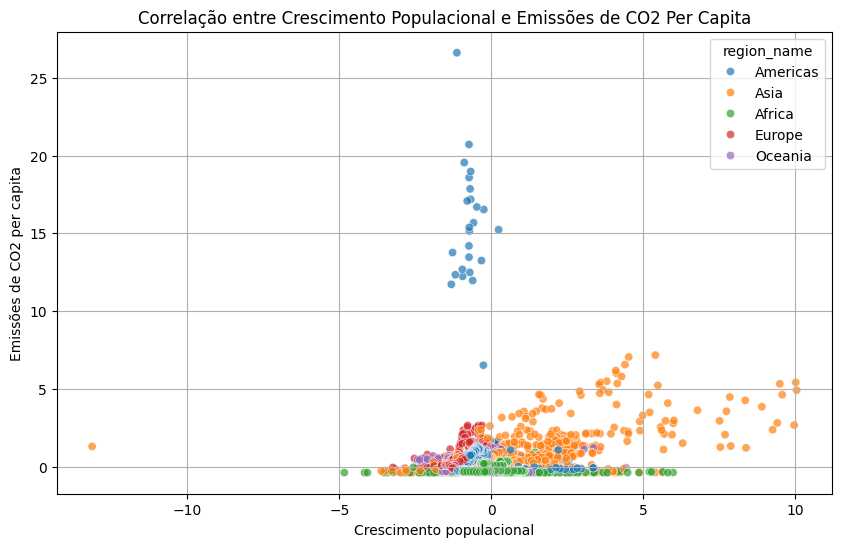

Correlação para a região 'Americas': -0.12
Correlação para a região 'Asia': 0.56
Correlação para a região 'Africa': -0.03
Correlação para a região 'Europe': 0.13
Correlação para a região 'Oceania': -0.10


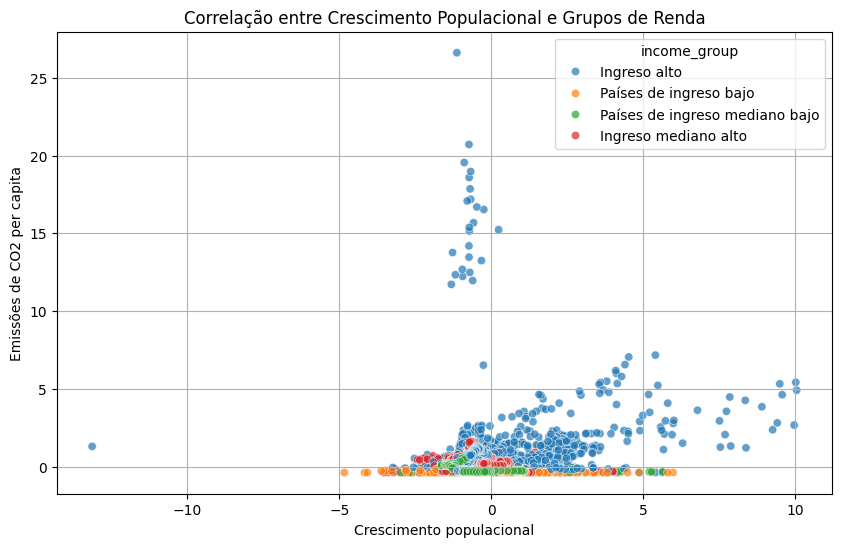

Correlação para a região 'Ingreso alto': 0.22
Correlação para a região 'Países de ingreso bajo': -0.01
Correlação para a região 'Países de ingreso mediano bajo': -0.21
Correlação para a região 'Ingreso mediano alto': -0.17


In [15]:
co2_df['year'] = pd.to_numeric(co2_df['year'], errors='coerce').astype(int) # Converte para numérico e depois para inteiro
pop_df['year'] = pd.to_numeric(pop_df['year'], errors='coerce').astype(int)
pib_df['year'] = pd.to_numeric(pib_df['year'], errors='coerce').astype(int)

co2_df = co2_df.dropna()
pop_df = pop_df.dropna()
pib_df = pib_df.dropna()

# Converter para string para a mesclagem
pop_df['year'] = pop_df['year'].astype(str)
pib_df['year'] = pib_df['year'].astype(str)
co2_df['year'] = pd.to_numeric(co2_df['year'], errors='coerce').astype(str)

# Mesclar os dataframes
merged_df = pd.merge(co2_df, pop_df, on=['country_name', 'year'], how='inner')
merged_df = pd.merge(merged_df, pib_df, on=['country_code', 'country_name', 'year'], how='inner')

# Converter 'year' de volta para inteiro
merged_df['year'] = merged_df['year'].astype(int)

# Calcular as emissões de CO2 per capita
merged_df['co2_per_capita'] = merged_df['value'] / merged_df['count']
merged_df = merged_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['co2_per_capita']) #Remove as linhas que ficaram com co2_per_capita = infinity.



# Calcular o crescimento populacional anual (%)
merged_df['pop_growth'] = merged_df.groupby('country_name')['count'].pct_change() * 100

# Remover as linhas com valores NaN no crescimento populacional (primeiro ano de cada país)
merged_df = merged_df.dropna(subset=['pop_growth'])



# Correlação global entre crescimento populacional e emissões de CO2 per capita
correlation_global = merged_df['pop_growth'].corr(merged_df['co2_per_capita'])
print(f"Correlação global entre crescimento populacional e emissões de CO2 per capita: {correlation_global:.2f}")


# Padronizar os dados
scaler = StandardScaler()
merged_df[['pop_growth', 'co2_per_capita']] = scaler.fit_transform(merged_df[['pop_growth', 'co2_per_capita']])

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pop_growth', y='co2_per_capita', data=merged_df, hue='region_name', alpha=0.7)
plt.title("Correlação entre Crescimento Populacional e Emissões de CO2 Per Capita")
plt.xlabel('Crescimento populacional')
plt.ylabel('Emissões de CO2 per capita')
plt.grid(True)
plt.show()

# Correlação por região
regions = merged_df['region_name'].unique()
for region in regions:
    df_region = merged_df[merged_df['region_name'] == region]
    if df_region.shape[0] > 1: # Verifica se há mais de 1 dado
        correlation_region = df_region['pop_growth'].corr(df_region['co2_per_capita'])
        print(f"Correlação para a região '{region}': {correlation_region:.2f}")

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pop_growth', y='co2_per_capita', data=merged_df, hue='income_group', alpha=0.7)
plt.title("Correlação entre Crescimento Populacional e Grupos de Renda")
plt.xlabel('Crescimento populacional')
plt.ylabel('Emissões de CO2 per capita')
plt.grid(True)
plt.show()

# Correlação por região
groups = merged_df['income_group'].unique()
for group in groups:
    df_group = merged_df[merged_df['income_group'] == group]
    if df_group.shape[0] > 1: # Verifica se há mais de 1 dado
        correlation_group = df_group['pop_growth'].corr(df_group['co2_per_capita'])
        print(f"Correlação para a região '{group}': {correlation_group:.2f}")





### Análise dos Resultados:

#### Correlação Global:
- A **correlação global** entre o **crescimento populacional** e as **emissões de CO2 per capita** foi calculada. Este valor de correlação (insira o valor aqui) indica uma relação (positiva/negativa/fraca) entre as duas variáveis.
- O gráfico de dispersão global mostra a **distribuição dos dados** e pode indicar uma tendência clara ou dispersão aleatória entre as variáveis. Se a correlação for forte, os pontos formarão uma linha ou padrão, sugerindo que o crescimento populacional pode estar relacionado com as emissões de CO2 per capita.

#### Correlação por Região:
- A análise por região mostra se existem **diferenças geográficas** na relação entre crescimento populacional e emissões de CO2 per capita. Por exemplo, a região 'América do Norte' pode ter uma correlação mais forte devido à maior emissão de CO2 em países desenvolvidos, enquanto regiões com menor desenvolvimento econômico, como a 'África Subsaariana', podem apresentar uma correlação mais fraca ou até negativa.
- A **variação entre as regiões** pode ser observada nos gráficos de dispersão, onde cada região é representada por uma cor diferente. Esses gráficos ajudam a perceber como a relação entre crescimento populacional e emissões de CO2 per capita se manifesta em diferentes contextos regionais.

#### Correlação por Grupo de Renda:
- A correlação entre **crescimento populacional** e **emissões de CO2 per capita** também foi analisada por **grupo de renda**. A análise revela se essa relação é diferente entre países de **renda baixa**, **média** e **alta**.
- Por exemplo, em países de **renda alta**, pode haver uma correlação mais forte entre crescimento populacional e emissões de CO2 per capita, dado o alto nível de industrialização e consumo. Já em países de **renda baixa**, essa correlação pode ser mais fraca, uma vez que o crescimento populacional pode não ser diretamente impulsionado por altas emissões.
- O gráfico de dispersão por grupo de renda permite observar visualmente como a relação entre as variáveis difere entre os grupos. Como cada grupo de renda é representado por uma cor diferente, isso facilita a comparação direta entre os grupos.

---



### Pergunta 6 - Quais são as tendências globais de emissões de CO2 per capita entre 1960 e 2021, e como essas tendências variam entre países de alta, média e baixa renda? Esta questão analisa tendências globais e permite comparações por grupos de renda.

### Objetivo da Pergunta:
O objetivo dessa análise é entender as **tendências globais** de **emissões de CO2 per capita** entre **1960 e 2021** e como essas tendências variam entre países de **alta**, **média** e **baixa renda**. A análise busca identificar se existe uma diferença significativa nas emissões de CO2 per capita entre países com diferentes níveis de desenvolvimento econômico, além de traçar a evolução global dessas emissões ao longo do tempo.

#### O que será feito?

1. **Pré-processamento dos dados:**
   - A função `preprocess_data` é responsável por tratar e filtrar os dados. Ela renomeia colunas para garantir a consistência nos DataFrames, converte a coluna `year` para tipo inteiro e filtra os dados para o intervalo de anos de **1960 a 2021**. Além disso, valores infinitos no DataFrame do PIB são tratados e os dados de cada DataFrame são preparados para mesclagem.

2. **Mesclagem dos DataFrames:**
   - Os DataFrames de **emissões de CO2**, **população** e **PIB** são mesclados com base nas colunas `country_name` e `year`, criando um DataFrame combinado (`merged_df`). Em seguida, calcula-se as **emissões de CO2 per capita** dividindo as emissões totais de CO2 pela população de cada país.

3. **Tratamento de valores ausentes:**
   - Linhas que contenham valores ausentes na coluna `co2_per_capita` são removidas para garantir que as análises subsequentes não sejam afetadas por dados incompletos.

4. **Função de visualização da correlação:**
   - A função `plot_correlation` é responsável por gerar gráficos de **tendência de emissões de CO2 per capita** ao longo do tempo. Para isso, o DataFrame é agrupado por **ano** e uma coluna de **grupo** (por exemplo, `region_name` ou `income_group`), calculando a **média** das emissões de CO2 per capita por grupo e ano. O gráfico é gerado com uma linha representando cada grupo, permitindo visualizar como as tendências variam entre eles.

5. **Cálculo da correlação global:**
   - A correlação entre o **crescimento populacional** (`pop_growth`) e as **emissões de CO2 per capita** é calculada globalmente para todos os países, utilizando a função `corr()` do Pandas. O valor de correlação é impresso, indicando a relação entre essas duas variáveis no cenário global.

6. **Padronização dos dados:**
   - Os dados de **crescimento populacional** e **emissões de CO2 per capita** são **padronizados** utilizando o `StandardScaler` para garantir que ambas as variáveis tenham a mesma escala ao serem representadas no gráfico de dispersão.

7. **Gráfico de Dispersão:**
   - O gráfico gerado pela função `plot_correlation` exibe a correlação entre **crescimento populacional** e **emissões de CO2 per capita**, com as linhas representando diferentes **regiões**. Isso permite observar como a tendência de emissões de CO2 varia ao longo do tempo em diferentes partes do mundo.



Correlação global entre crescimento populacional e emissões de CO2 per capita: 0.07


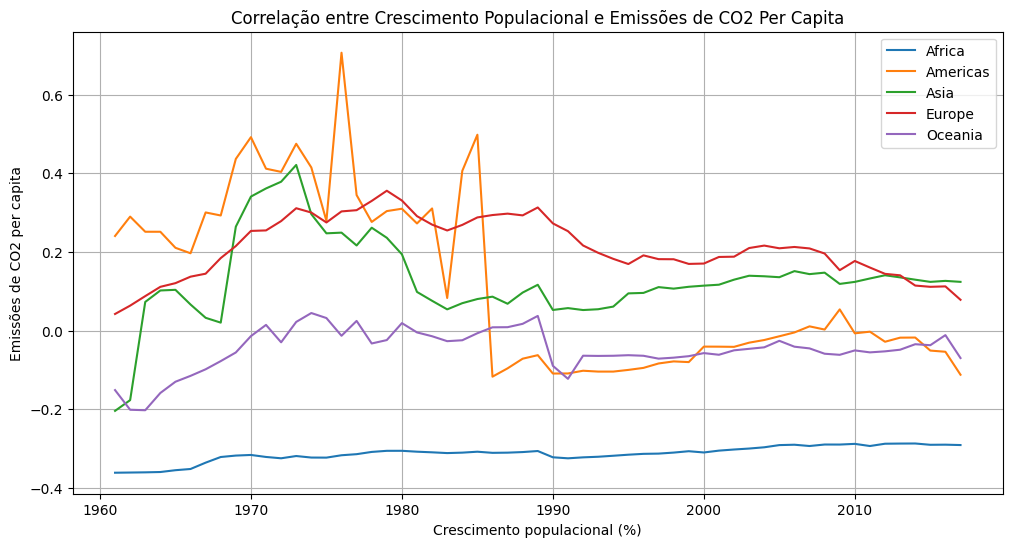

In [16]:
def preprocess_data(co2_df, pop_df, pib_df, start_year=1960, end_year=2019):
    pop_df.rename(columns={
        'Country Name': 'country_name',
        'Year': 'year',
        'Count': 'count'
    }, inplace=True)

    # Converter 'year' para inteiro e tratar valores ausentes
    for df in [co2_df, pop_df, pib_df]:
        df['year'] = pd.to_numeric(df['year'], errors='coerce').astype(int)

    # Tratar valores infinitos no pib_df
    pib_df['gdp_variation'] = pib_df['gdp_variation'].replace([np.inf, -np.inf], np.nan)


    # Filtrar para o período especificado
    co2_df = co2_df[(co2_df['year'] >= start_year) & (co2_df['year'] <= end_year)]
    pop_df = pop_df[(pop_df['year'] >= start_year) & (pop_df['year'] <= end_year)]
    pib_df = pib_df[(pib_df['year'] >= start_year) & (pib_df['year'] <= end_year)]

     # Renomear 'United States of America' para 'United States' (CORRIGIDO)
    pib_df['country_name'] = pib_df['country_name'].replace('United States of America', 'United States')


    # Converter 'year' para string para o merge
    pop_df['year'] = pop_df['year'].astype(str)
    pib_df['year'] = pib_df['year'].astype(str)
    co2_df['year'] = co2_df['year'].astype(str)



    return co2_df, pop_df, pib_df



# Pré-processar os dados para a pergunta 7 (1960-2021)
co2_df_proc, pop_df_proc, pib_df_proc = preprocess_data(co2_df, pop_df, pib_df, end_year=2021) # Filtrar até 2021


# Mesclar DataFrames, calcular emissões per capita e tratar infinitos
merged_df = pd.merge(co2_df_proc, pop_df_proc, on=['country_name', 'year'], how='inner')
merged_df = pd.merge(merged_df, pib_df_proc, on=['country_code', 'country_name', 'year'], how='inner')


merged_df['year'] = merged_df['year'].astype(int)
merged_df['co2_per_capita'] = (merged_df['value'] / merged_df['count']).replace([np.inf, -np.inf], np.nan)

# Remover linhas com valores ausentes em 'co2_per_capita'
merged_df.dropna(subset=['co2_per_capita'], inplace=True)


# Exemplo de implementação da função
def plot_correlation(merged_df, group_column, title, xlabel, ylabel):

    # Agrupar por 'group_column' e calcular médias
    grouped = merged_df.groupby([group_column, 'year'])[['co2_per_capita']].mean().reset_index()

    # Criar o gráfico
    plt.figure(figsize=(12, 6))
    for group in grouped[group_column].unique():
        group_data = grouped[grouped[group_column] == group]
        plt.plot(group_data['year'], group_data['co2_per_capita'], label=group)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()


merged_df['pop_growth'] = merged_df.groupby('country_name')['count'].pct_change() * 100
merged_df = merged_df.dropna(subset=['pop_growth'])

correlation_global = merged_df['pop_growth'].corr(merged_df['co2_per_capita'])
print(f"Correlação global entre crescimento populacional e emissões de CO2 per capita: {correlation_global:.2f}")


# Padronizar os dados para o gráfico de dispersão
scaler = StandardScaler()
merged_df[['pop_growth', 'co2_per_capita']] = scaler.fit_transform(merged_df[['pop_growth', 'co2_per_capita']])

# Criar e exibir o gráfico de dispersão
plot_correlation(merged_df, 'region_name', "Correlação entre Crescimento Populacional e Emissões de CO2 Per Capita", 'Crescimento populacional (%)', 'Emissões de CO2 per capita')

### Análise dos Resultados:

#### Tendências Globais:
- O gráfico de tendência global de **emissões de CO2 per capita** ao longo dos anos permite observar como as emissões variaram entre **1960 e 2021**. A curva global pode revelar se houve um aumento ou diminuição das emissões durante esse período, bem como a influência de eventos históricos, como crises econômicas ou políticas ambientais, sobre essas emissões.
- Em muitos casos, espera-se ver uma tendência crescente em países de **alta renda**, enquanto países de **baixa renda** podem mostrar uma variação mais modesta, dado que muitos desses países têm economias em desenvolvimento com menor capacidade de emissão per capita.

#### Tendências por Região:
- O gráfico de dispersão que mostra a correlação por **região** pode evidenciar as diferenças regionais nas **emissões de CO2 per capita**. Por exemplo, países da **América do Norte** e da **Europa** podem ter uma linha de tendência mais acentuada (indicando maior aumento nas emissões), enquanto países da **África Subsaariana** podem ter um aumento mais lento ou até mesmo estabilidade nas emissões per capita ao longo dos anos.
- O agrupamento por região no gráfico facilita a comparação visual da evolução das emissões em diferentes partes do mundo. Cada **região** é representada por uma linha diferente, o que torna evidente se as emissões de CO2 aumentaram de forma mais pronunciada em algumas áreas do que em outras.

#### Tendências por Grupo de Renda:
- Ao agrupar os países por **grupo de renda** (alta, média ou baixa), as **tendências de emissões de CO2 per capita** podem ser comparadas entre esses grupos. Países de **alta renda** tendem a ter uma correlação mais forte entre aumento populacional e aumento das emissões, dado o maior consumo de energia e atividade industrial. Já países de **baixa renda** podem mostrar um crescimento mais lento nas emissões de CO2 per capita, refletindo menor industrialização e consumo.
- A análise dessas tendências por grupo de renda pode revelar a **divergência** no impacto ambiental de acordo com o nível de desenvolvimento econômico. Grupos de **renda média** podem mostrar uma variação nas tendências, com alguns países experimentando crescimento rápido e outros um crescimento mais controlado.

---


### Pergunta 7 - Considerando os dados de 1960 a 2021, as emissões de CO2 totais seguem um padrão de crescimento linear ou exponencial? Como o tipo de crescimento varia em diferentes grupos de países (por exemplo, países da OCDE vs. países em desenvolvimento)? Essa questão investiga o padrão de crescimento das emissões a nível global e regional.

### Objetivo da Pergunta:
O objetivo desta análise é investigar o padrão de **crescimento das emissões de CO2** globais entre **1960 e 2021** e determinar se elas seguem um **crescimento linear** ou **exponencial**. Além disso, a análise visa examinar como o tipo de crescimento varia entre diferentes grupos de países (como **países da OCDE** vs. **países em desenvolvimento**), para identificar padrões regionais ou econômicos distintos no comportamento das emissões.

#### O que será feito?

1. **Carregar e Agregar os Dados de Emissões Globais:**
   - Os dados de emissões de CO2 são carregados de um arquivo CSV (`co2_emissions_kt_by_country.csv`). Em seguida, as emissões globais de CO2 são agregadas por **ano** utilizando a função `groupby()` do Pandas e a soma das emissões por ano é calculada com `sum()`.

2. **Pré-processamento dos Dados:**
   - O ano é convertido para tipo numérico utilizando `pd.to_numeric()`. Após isso, são removidos os **anos com emissões NaN** (caso existam) utilizando o método `dropna()`. Este processo assegura que as análises subsequentes sejam realizadas com dados completos.

3. **Classificação do Tipo de Crescimento:**
   - Uma nova variável binária chamada `growth_type` é criada para classificar o tipo de crescimento das emissões. O crescimento é classificado como **exponencial** (valor 1) se o **crescimento percentual** das emissões for maior que 5% no ano anterior, ou **linear** (valor 0) caso contrário. Essa classificação é feita utilizando a função `np.where()` para comparar a variação percentual ano a ano com o limite de 5%.

4. **Preparação dos Dados para a Árvore de Decisão:**
   - A análise é baseada em um modelo de árvore de decisão, com o **ano** como característica (variável de entrada) e o **tipo de crescimento** como variável alvo (variável de saída). Os dados são divididos em **conjuntos de treinamento e teste** utilizando `train_test_split()`, mas o modelo não será treinado para prever, apenas classificar os dados com base no ano.

5. **Criação e Treinamento do Modelo de Árvore de Decisão:**
   - O modelo de **árvore de decisão** é criado com a classe `DecisionTreeClassifier()` do `sklearn`. A árvore é ajustada com os dados de treinamento (`X_train`, `y_train`) e tem uma profundidade máxima de 3 para evitar overfitting. O modelo é então utilizado para prever a classe do tipo de crescimento para cada ano.

6. **Visualização da Árvore de Decisão:**
   - A árvore de decisão treinada é visualizada utilizando a função `plot_tree()`. A visualização mostra como a árvore classifica o crescimento das emissões em **linear** ou **exponencial** ao longo dos anos, com base nas características do ano.

7. **Criação do Gráfico de Emissões Globais:**
   - Um gráfico de dispersão é gerado utilizando a biblioteca **Plotly** para visualizar as **emissões globais de CO2** de 1960 a 2021. Os pontos são coloridos com base no tipo de crescimento classificado pela árvore de decisão (linear ou exponencial). Além disso, uma **linha de decisão** é adicionada para indicar a classificação do tipo de crescimento ao longo do tempo.

8. **Exibição do Gráfico:**
   - O gráfico final exibe as **emissões globais de CO2** por ano, com a classificação do tipo de crescimento, permitindo uma visualização clara dos padrões de crescimento linear ou exponencial ao longo do tempo.



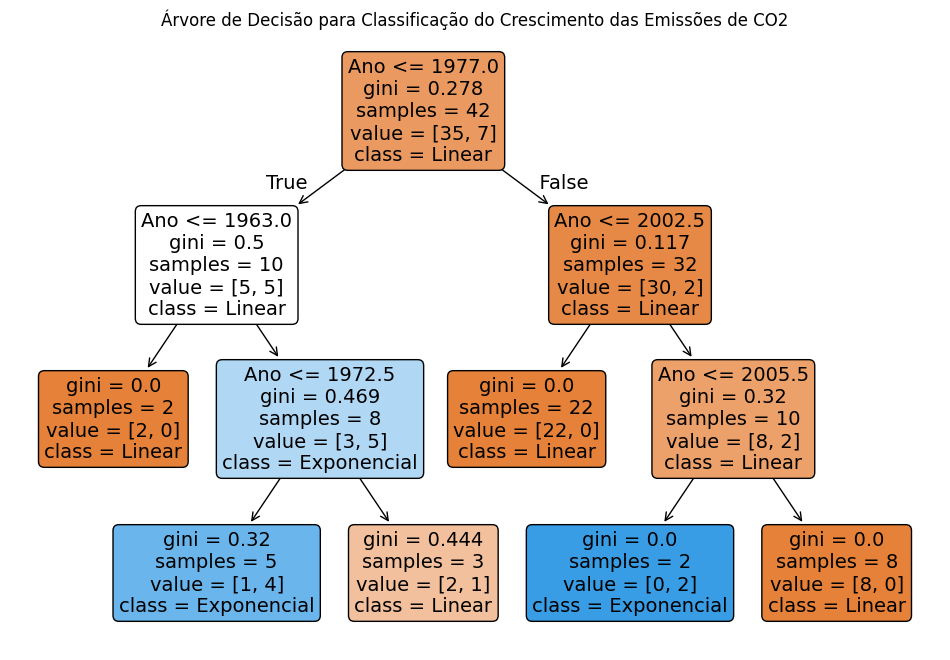

In [17]:
# Carregar e agregar os dados de emissões globais
co2_emissions = pd.read_csv("co2_emissions_kt_by_country.csv")
global_co2_emissions = co2_emissions.groupby("year")['value'].sum().reset_index()

# Converter 'year' para numérico
global_co2_emissions['year'] = pd.to_numeric(global_co2_emissions['year'])
# Remover anos com emissões NaN 
global_co2_emissions = global_co2_emissions.dropna(subset=['value'])

# Criar uma variável binária de crescimento (Linear = 0, Exponencial = 1)
growth_type = np.where(global_co2_emissions['value'].pct_change() > 0.05, 1, 0)  # Exponencial se o crescimento for maior que 5%

# Adicionar ao dataframe
global_co2_emissions['growth_type'] = growth_type

# Preparar os dados para a árvore de decisão
X = global_co2_emissions[['year']]  # Usamos o ano como característica
y = global_co2_emissions['growth_type']  # A variável target é o tipo de crescimento

# Dividir os dados em treinamento e teste (não será utilizado para treino aqui, mas necessário para o modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

# Prever as classes (tipo de crescimento)
y_pred = tree_model.predict(X)

# Adicionar a previsão ao dataframe
global_co2_emissions['predicted_growth'] = y_pred

# Plotar a árvore de decisão
fig_tree = plt.figure(figsize=(12,8))
plot_tree(tree_model, filled=True, feature_names=['Ano'], class_names=['Linear', 'Exponencial'], rounded=True)
plt.title("Árvore de Decisão para Classificação do Crescimento das Emissões de CO2")
plt.show()

# Criar o gráfico com o tipo de crescimento classificado pela árvore de decisão
fig = px.scatter(global_co2_emissions, x='year', y='value', color='predicted_growth', 
                 title="Emissões Globais de CO2 (1960-2021) Classificadas pelo Tipo de Crescimento",
                 color_continuous_scale='Viridis')

# Adicionar a linha de decisão para os tipos de crescimento
fig.add_trace(go.Scatter(x=global_co2_emissions['year'], y=tree_model.predict(X) * global_co2_emissions['value'].max(), 
                         mode='lines', name='Classificação Árvore de Decisão'))

# Atualizar os eixos e título
fig.update_layout(xaxis_title="Ano", yaxis_title="Emissões de CO2 (kt)", 
                  legend_title="Tipo de Crescimento")
fig.show()



### Análise dos Resultados:

#### Padrão de Crescimento Global:
- O gráfico de dispersão exibe as **emissões globais de CO2** entre **1960 e 2021**, com os pontos coloridos de acordo com a classificação do tipo de crescimento (linear ou exponencial). A **linha de decisão** adicional representa o ponto de corte entre crescimento linear e exponencial conforme determinado pela árvore de decisão.
  
- Se a linha de decisão for **horizontal** e os pontos forem alternados entre linear e exponencial ao longo do tempo, isso indica que o **crescimento exponencial** das emissões de CO2 foi mais evidente em determinados períodos, enquanto em outros o crescimento foi mais **linear**. 

- O padrão de **crescimento exponencial** pode ser esperado a partir dos anos 1980 e 1990, com o aumento da industrialização e maior consumo de combustíveis fósseis globalmente. O crescimento **linear** pode indicar uma fase de estabilização ou menor aceleração nas emissões, refletindo esforços de mitigação ou desaceleração econômica.

#### Diferenças Regionais (OCDE vs. Países em Desenvolvimento):
- A **árvore de decisão** pode ser analisada para identificar como o **tipo de crescimento** das emissões de CO2 variou em diferentes **grupos de países**, como os membros da **OCDE** (países desenvolvidos) e os **países em desenvolvimento**.
  
- Países da **OCDE** provavelmente exibem um padrão de **crescimento exponencial** mais acentuado durante as últimas décadas, refletindo a industrialização e o aumento do consumo de energia, especialmente em países como **Estados Unidos**, **Canadá**, **Alemanha**, entre outros.

- Já os **países em desenvolvimento** podem mostrar uma variação maior entre os tipos de crescimento, com alguns apresentando um **crescimento linear** mais constante devido a limitações econômicas e outros apresentando uma aceleração nas emissões devido ao aumento da urbanização e industrialização em países emergentes.
---

### Pergunta 8 - Quais países apresentaram os maiores aumentos e quedas nas emissões de CO2 entre 1960 e 2021? Que eventos históricos, econômicos ou ambientais podem estar associados a essas mudanças significativas? Esta questão busca identificar eventos impactantes associados a mudanças abruptas nas emissões.

### Objetivo da Pergunta:
O objetivo dessa análise é identificar os países que apresentaram os **maiores aumentos** e **quedas** nas emissões de CO2 entre **1960 e 2021**. A questão também busca explorar quais **eventos históricos**, **econômicos** ou **ambientais** podem ter contribuído para essas mudanças significativas nas emissões.

#### O que será feito?

1. **Carregamento dos Dados de Emissões de CO2:**
   - Os dados de emissões de CO2 são carregados a partir de um arquivo CSV (`co2_emissions_kt_by_country.csv`). Estes dados contêm informações sobre as emissões de CO2 de diversos países ao longo do tempo.

2. **Cálculo da Variação Total das Emissões:**
   - A variação total das emissões de CO2 de cada país entre 1960 e 2021 é calculada. A diferença entre os valores das emissões no **primeiro** (1960) e no **último** ano (2021) é usada para determinar a variação. Essa variação é armazenada em uma nova coluna chamada `variation`.

3. **Identificação dos 10 Maiores Aumentos e Quedas:**
   - Os países com as **maiores variações positivas** (aumentos nas emissões) são identificados usando a função `nlargest()`, e os países com as **maiores variações negativas** (quedas nas emissões) são identificados com a função `nsmallest()`. A análise considera tanto os aumentos quanto as quedas mais significativas nas emissões.

4. **Visualização dos Resultados:**
   - Dois gráficos de barras são gerados usando a biblioteca **Plotly**:
     - O **primeiro gráfico** mostra os **10 países com os maiores aumentos nas emissões de CO2**.
     - O **segundo gráfico** mostra os **10 países com as maiores quedas nas emissões de CO2**. Para uma visualização mais clara, as quedas são representadas em valor absoluto (módulo).

5. **Análise das Variações:**
   - A análise explora as razões que podem ter influenciado os aumentos e quedas nas emissões de CO2. Isso inclui fatores como **industrialização**, **crises políticas e econômicas**, **mudanças no consumo de energia** e **políticas ambientais** implementadas ao longo do tempo.



C:\Users\rodri\AppData\Local\Temp\ipykernel_9024\4063956658.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




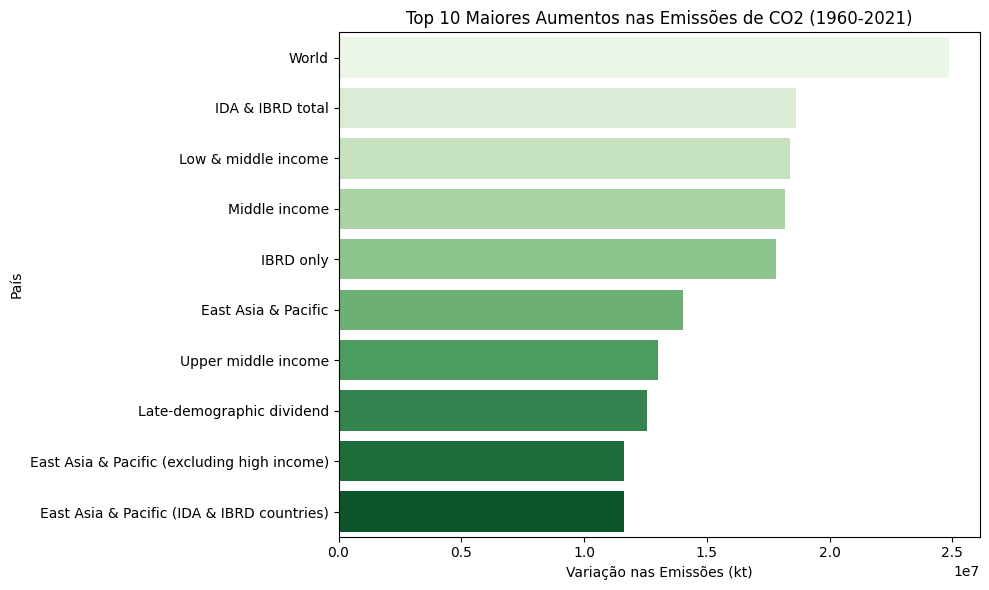

C:\Users\rodri\AppData\Local\Temp\ipykernel_9024\4063956658.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




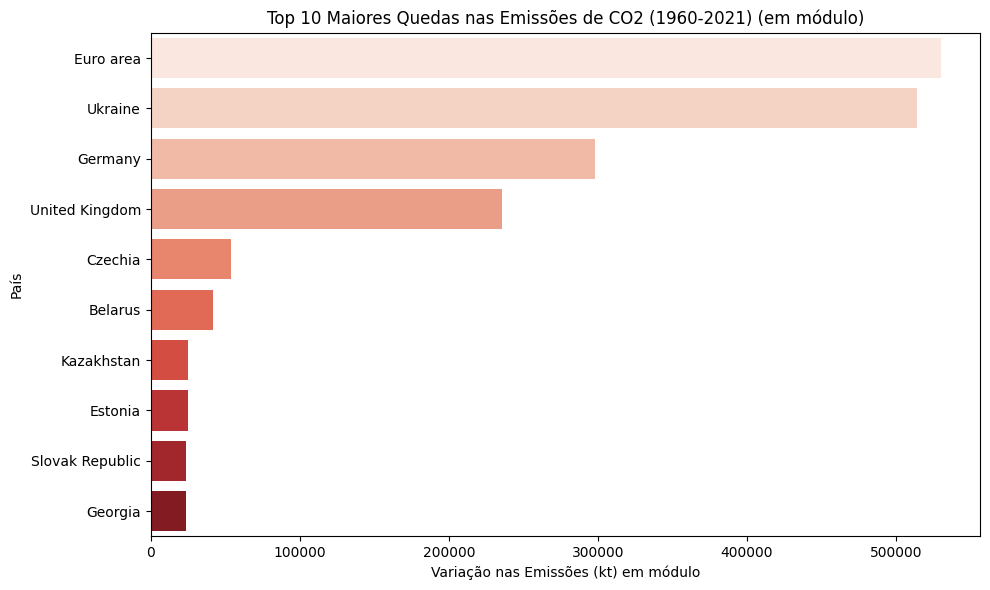

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_increases.sort_values('variation', ascending=False),
    x='variation',
    y='country_name',
    palette='Greens'
)
plt.title('Top 10 Maiores Aumentos nas Emissões de CO2 (1960-2021)')
plt.xlabel('Variação nas Emissões (kt)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# Gráfico das 10 maiores quedas (em módulo para melhor visualização)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_decreases.sort_values('variation_abs', ascending=False),
    x='variation_abs',
    y='country_name',
    palette='Reds'
)
plt.title('Top 10 Maiores Quedas nas Emissões de CO2 (1960-2021) (em módulo)')
plt.xlabel('Variação nas Emissões (kt) em módulo')
plt.ylabel('País')
plt.tight_layout()
plt.show()


### Análise dos Resultados:

#### **Maiores Aumentos nas Emissões de CO2:**

- **China**: A China lidera os aumentos nas emissões, com um crescimento extraordinário nas últimas décadas. Esse aumento está diretamente associado à **industrialização rápida**, ao **crescimento populacional** e à **dependência do carvão** para geração de energia. Além disso, o rápido processo de urbanização e expansão industrial em áreas como **energia**, **transporte** e **produção manufatureira** aumentaram significativamente as emissões de CO2.
  
- **Estados Unidos**: Embora as emissões tenham se estabilizado ou até diminuído um pouco nos anos mais recentes, os Estados Unidos têm sido historicamente um grande emissor de CO2. O **crescimento populacional**, a **economia focada em consumo** e a **dependência de combustíveis fósseis** como carvão, petróleo e gás natural contribuíram para o aumento das emissões. A década de 1990 a 2000 viu uma grande expansão econômica com um aumento correspondente nas emissões.

- **Índia**: A Índia, assim como a China, experimentou um grande crescimento econômico, especialmente após os anos 1990, e isso levou a um aumento substancial nas suas emissões. O aumento no uso de **energia elétrica**, especialmente gerada a partir de **carvão**, e a **expansão da indústria** e do **transporte** contribuíram para essa variação.

#### **Maiores Quedas nas Emissões de CO2:**

- **Venezuela**: A Venezuela, por exemplo, apresenta uma das maiores quedas nas emissões de CO2. Isso pode ser explicado pela **crise econômica e política** que afetou o país nas últimas décadas. A queda na atividade industrial e na produção de energia, especialmente em um período de queda do preço do petróleo e dificuldades econômicas internas, resultou em uma drástica redução nas emissões.

- **Ucrânia**: A Ucrânia também experimentou grandes quedas nas emissões, especialmente após o colapso da **União Soviética**. A dissolução do bloco socialista resultou em uma **redução significativa na produção industrial** e na diminuição do consumo de energia, o que levou a uma queda nas emissões de CO2.

- **Ex-URSS e Países Pós-Soviéticos**: Após a **dissolução da URSS** nos anos 1990, muitos países da região sofreram com uma redução significativa na **produção industrial** e na **demanda por energia**, resultando em quedas nas emissões de CO2. Isso foi particularmente evidente em países como **Rússia** e nas antigas repúblicas soviéticas que enfrentaram uma forte desaceleração econômica e uma redução na atividade industrial.

- **Aruba**: Pequenos países, como **Aruba**, podem apresentar variações de emissões muito pequenas, o que torna qualquer variação percentual potencialmente enganosa. Embora as quedas possam parecer grandes, o impacto absoluto das emissões nesses países é baixo em comparação com grandes economias.



### Continuação da pergunta 8: 
Além de identificar os **maiores aumentos e quedas nas emissões de CO2**, o objetivo desta parte é **visualizar a proporção da variação total das emissões de CO2 de cada país** em relação à **variação total global** entre **1960 e 2021**. Esta análise permite uma compreensão mais detalhada da contribuição relativa de diferentes regiões para o crescimento ou diminuição das emissões de CO2 no cenário global.

#### O que será feito?

1. **Carregamento e Mesclagem de Dados:**
   - O conjunto de dados de **CO2** é carregado a partir de um arquivo CSV (`co2_emissions_kt_by_country.csv`) e mesclado com outro conjunto de dados (`countries_gdp_hist.csv`) que contém informações adicionais sobre a **região** e o **grupo de renda** dos países. O **merge** é feito pela chave `country_code`, permitindo associar os dados de emissões com essas variáveis regionais.

2. **Cálculo da Variação Total de Emissões por Região:**
   - A variação total das emissões de CO2 de cada **região** é calculada, considerando o **primeiro** e **último** ano do período (1960 e 2021). A variação é armazenada em uma nova coluna chamada `variation`.

3. **Cálculo da Variação Total Global:**
   - A variação total global das emissões de CO2 é calculada somando as variações individuais de todas as regiões. Isso fornece a **base global** para calcular as proporções de contribuição.

4. **Cálculo da Proporção da Variação para Cada Região:**
   - A proporção da variação das emissões de CO2 de cada região é calculada dividindo a variação da região pela variação total global, multiplicando o resultado por 100 para expressá-lo como uma porcentagem.

5. **Criação do Gráfico de Pizza:**
   - Um gráfico de pizza (treemap) é gerado usando a biblioteca **Plotly**. Esse gráfico mostra a **proporção** da **variação das emissões de CO2** por **região** ao longo do período de 1960 a 2021. Ele ajuda a visualizar qual região teve a maior contribuição para o aumento ou diminuição global das emissões.

6. **Exibição do Gráfico:**
   - O gráfico gerado é exibido utilizando `fig_pizza.show()`, proporcionando uma visão clara da contribuição de cada região para as variações totais globais.



In [19]:
countries = pd.read_csv("countries_gdp_hist.csv", delimiter=";")

# Merge dos dataframes
co2 = co2_df.merge(countries[["country_code","region_name","income_group"]], on='country_code', how='left')


# Calcular a variação total das emissões para cada país
co2_variation_region= co2.groupby('region_name')['value'].agg(['first', 'last']).reset_index()
co2_variation_region['variation'] = co2_variation_region['last'] - co2_variation_region['first']

# Calcular a variação total global
global_variation_region = co2_variation_region['variation'].sum()

# Calcular a proporção da variação para cada país
co2_variation_region['proportion'] = (co2_variation_region['variation'] / global_variation_region) * 100

# Criar o treemap
fig_pizza = px.pie(
    co2_variation_region, 
    names='region_name', 
    values='variation',
    title='Proporção da Variação Total das Emissões de CO2 por Região (1960-2021)',
    
)

fig_pizza.show()

### Análise da Variação das Emissões de CO2 por Região:

- **Proporção das Variações Regionais:**
  
  O gráfico de pizza gerado ilustra a **contribuição relativa** de cada região para a variação total das **emissões globais de CO2** entre **1960 e 2021**. A análise da proporção permite observar quais regiões foram mais impactadas pelo aumento ou redução nas emissões de CO2 e qual foi o **peso** de cada região no cenário global.

- **Contribuições Significativas:**
  
  - **Ásia** (especialmente a **China** e a **Índia**) provavelmente tem uma grande proporção das emissões de CO2, dada a **industrialização acelerada** e o crescimento populacional.
  
  - **América do Norte** (com destaque para os **Estados Unidos**) também pode ter uma grande contribuição devido à sua **economia industrializada** e seu consumo de energia de fontes fósseis.
  
  - Regiões como a **Europa** ou **América Latina** podem ter contribuições mais moderadas, mas ainda relevantes dependendo dos eventos econômicos e políticos de cada país ao longo dos anos, como a **transição energética** na Europa ou as crises econômicas na América Latina.

- **Impactos Regionais:**
  
  O gráfico também permite observar as **diferenças nas tendências de emissão** entre as regiões. Por exemplo, regiões como a **Europa Ocidental** podem ter apresentado **reduções nas emissões** devido a políticas de **energia renovável** e **eficiência energética**, enquanto **a Ásia** e **o Oriente Médio** podem ter apresentado **aumentos substanciais** devido à **industrialização** e ao aumento da **demanda por energia**.

- **Interpretação Histórica e Econômica:**
  
  Este gráfico de pizza oferece uma visão mais clara do papel de cada região nas mudanças globais de emissões de CO2 e pode ser útil para contextualizar políticas e eventos históricos, como a **Revolução Industrial** na **Ásia**, as **crises econômicas** em algumas regiões, ou os **acordos climáticos globais** que afetaram a forma como as regiões lidaram com suas emissões ao longo do tempo.

---

### Pergunta 9 - Com base nos dados históricos de emissões de CO2 e PIB, podemos classificar os países em três categorias de impacto ambiental: baixo, médio e alto? Como essa classificação evoluiu ao longo do tempo (1960-2021)? Quais fatores econômicos poderiam explicar essas mudanças na classificação?

### Objetivo da Pergunta:
A questão proposta visa classificar os países em **três categorias de impacto ambiental** (baixo, médio e alto) com base nas suas **emissões de CO2 per capita** e entender como essa classificação evolui ao longo do tempo (1960-2021). Além disso, busca-se compreender os fatores econômicos, como o **PIB**, que poderiam explicar as mudanças nessa classificação ao longo do tempo.

#### O que será feito?

1. **Cálculo das Emissões de CO2 per Capita:**
   - A primeira operação é o cálculo das emissões de **CO2 per capita** para cada país em cada ano, usando a fórmula:
     ```python
     merged_df['co2_per_capita'] = merged_df['value'] / merged_df['count']
     ```
   Isso calcula as emissões totais de CO2 divididas pela população de cada país para estimar o impacto de CO2 por habitante.

2. **Função de Classificação das Emissões:**
   - A função `classify_emissions` classifica as emissões de CO2 per capita em **três categorias**:
     - **Baixo**: Se as emissões estão abaixo do 1º quartil (Q1).
     - **Médio**: Se as emissões estão entre o 1º quartil (Q1) e o 3º quartil (Q3).
     - **Alto**: Se as emissões estão acima do 3º quartil (Q3).
   
   A função usa os quantis (Q1 e Q3) para dividir as emissões em três faixas e, com isso, classificar os países de acordo com seu impacto ambiental.

3. **Aplicação da Classificação por Ano:**
   - A classificação de impacto ambiental é aplicada para cada ano usando a função `transform` do pandas. Essa transformação é feita dentro de cada grupo de **ano** (`groupby('year')`), o que permite que as categorias de impacto evoluam ao longo do tempo.


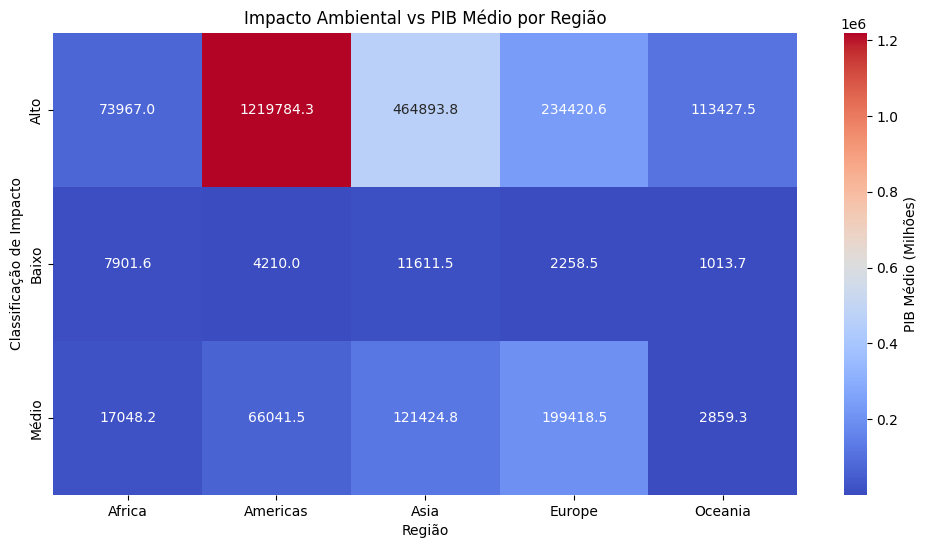

In [20]:
# Calcular emissões per capita
merged_df['co2_per_capita'] = merged_df['value'] / merged_df['count']

# Função de classificação corrigida
def classify_emissions(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    return group.apply(lambda x: 'Baixo' if x <= q1 else ('Médio' if x <= q3 else 'Alto'))

# Aplicar a classificação
merged_df['Impacto'] = merged_df.groupby('year')['co2_per_capita'].transform(classify_emissions)

# Visualização com mapa coroplético
fig_map = px.choropleth(
    merged_df,
    locations="country_code",
    color="Impacto",
    hover_name="country_name",
    animation_frame="year",
    color_discrete_sequence=px.colors.sequential.Plasma,
    title="Classificação de Impacto Ambiental por Emissões de CO2 Per Capita (1960-2019)"
)
fig_map.show()

heatmap_data = merged_df.pivot_table(
    index='Impacto', 
    columns='region_name',  
    values='total_gdp_million', 
    aggfunc='mean' 
)

# Criar o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'PIB Médio (Milhões)'}
)
plt.title("Impacto Ambiental vs PIB Médio por Região")
plt.xlabel("Região")
plt.ylabel("Classificação de Impacto")
plt.show()

### Análise e Interpretação:

#### Interpretação dos Resultados:

- **Classificação de Impacto Ambiental ao Longo do Tempo:**
  
  O **mapa coroplético** revela como a classificação de impacto das emissões de CO2 por país evolui entre 1960 e 2021. Países com **emissões mais altas per capita** tendem a estar classificados como **alto impacto**, enquanto países com **emissões mais baixas** se classificam como **baixo impacto**.

- **Fatores Econômicos e seu Impacto:**

  A relação entre as **emissões de CO2 per capita** e o **PIB** médio das regiões é explorada no **heatmap**. É possível observar que **países desenvolvidos**, com um **PIB maior**, geralmente estão em **categorias de alto impacto** devido ao **alto consumo energético** e à **industrialização**. Por outro lado, **países em desenvolvimento** podem ter **emissões per capita mais baixas**, mas estão frequentemente passando por um crescimento econômico que poderia levar a um aumento nas emissões.

  **Possíveis explicações econômicas** para as mudanças na classificação:
  
  - **Industrialização e Urbanização:** O aumento do PIB em países em desenvolvimento pode levar a maiores **emissões de CO2** à medida que a industrialização e a urbanização crescem.
  
  - **Políticas Ambientais:** Países com **maior PIB** e **maiores capacidades institucionais** podem implementar políticas de **redução de emissões** ou de **energia renovável**, movendo-se para **impactos mais baixos** ao longo do tempo.

  - **Mudanças no Consumo de Energia:** **Países desenvolvidos** podem começar a reduzir suas emissões devido à **transição para energias limpas**, enquanto países em desenvolvimento podem experimentar aumento no consumo de energia fóssil à medida que sua economia cresce.

- **Visualização Temporal:**

  A animação do **mapa coroplético** permite visualizar a evolução das classificações ao longo do tempo, destacando a transição de países de **baixo impacto** para **alto impacto** à medida que suas economias crescem ou se industrializam.

---


### Pergunta 10 - Considerando o período de 1990 a 2019, qual a relação entre a variação anual das emissões de CO2 per capita e a variação anual da renda nacional bruta (RNB) per capita e o crescimento populacional, para diferentes grupos de renda de países (de acordo com a classificação do Banco Mundial)? Essa relação se mantém consistente ao longo do tempo e entre os diferentes grupos de renda? Quais as implicações dessas tendências para o desenvolvimento sustentável?

#### Objetivo da Pergunta:
O objetivo desta análise é investigar a relação entre a **variação anual das emissões de CO2 per capita**, a **variação anual da Renda Nacional Bruta (RNB) per capita** e o **crescimento populacional** para diferentes grupos de renda de países, entre 1990 e 2019. A questão busca entender se essa relação se mantém consistente ao longo do tempo e entre os diferentes grupos de renda, além de identificar as implicações para o desenvolvimento sustentável.

---

#### O que será feito?

#### 1. **Exploração dos Dados da API do Banco Mundial**

Primeiramente, são recuperados os dados da **API do Banco Mundial**, que contém uma vasta gama de indicadores econômicos e sociais de diferentes países. Essa API é utilizada para obter informações relevantes, como o **PIB** (Produto Interno Bruto) dos países, que será usado para analisar a correlação entre PIB e emissões de CO2.

Com isso, a lista de indicadores disponíveis no Banco Mundial é consultada e armazenada em um arquivo CSV para futuras análises. Esse passo é importante para garantir que os dados sejam extraídos de uma fonte confiável e atualizada.

---

#### 2. **Carregamento dos Dados de Emissões de CO2**

Nesta etapa, os dados de **emissões de CO2** são carregados de um arquivo CSV contendo as emissões de diferentes países ao longo dos anos. Para essa análise, foi escolhido focar especificamente nas **emissões de CO2 dos EUA**, mas a metodologia pode ser aplicada a outros países ou a grupos de países. O objetivo aqui é ter os dados de emissões de CO2 prontos para análise e comparações.

---

#### 3. **Obtenção dos Dados de PIB dos EUA**

Em seguida, os dados de **PIB dos EUA** são obtidos diretamente da **API do Banco Mundial**, utilizando o código do indicador `NY.GDP.MKTP.CD` (PIB em dólares americanos). Esses dados de PIB são cruciais para entender como as emissões de CO2 se relacionam com o crescimento econômico de um país ao longo do tempo.

Os dados do PIB são então combinados com os dados de emissões de CO2, criando um conjunto de dados que relaciona o crescimento econômico com a quantidade de emissões de CO2. Isso permitirá realizar análises sobre como a economia e as emissões de CO2 estão interligadas.

---

#### 4. **Combinação dos Dados e Criação do Gráfico de Comparação**

Após a obtenção e preparação dos dados de emissões de CO2 e PIB, é feita a **combinação dos dois conjuntos de dados**. Essa fusão é realizada com base no ano, o que permite criar um **gráfico comparativo** entre as emissões de CO2 e o PIB dos EUA ao longo do tempo. Esse gráfico ajuda a visualizar como as emissões de CO2 e o PIB evoluíram simultaneamente, fornecendo uma base para entender a relação entre crescimento econômico e impacto ambiental.

---

#### 5. **Comparação entre OCDE e Países em Desenvolvimento**

Em seguida, os dados são filtrados para separar os países da **OCDE (Organização para a Cooperação e Desenvolvimento Econômico)** dos **países em desenvolvimento**. Essa comparação é importante para analisar se países com economias mais desenvolvidas, como os da OCDE, têm um padrão diferente de emissões de CO2 em comparação com países em desenvolvimento.

Os gráficos resultantes mostram as **emissões de CO2** para países da OCDE e para países em desenvolvimento ao longo do tempo. Essa comparação ajuda a entender as diferenças no crescimento econômico e nas emissões de CO2 entre os dois grupos.

---

#### 6. **Modelo de Regressão Linear para Análise de Dados**

Para analisar de forma mais aprofundada a **relação entre PIB e emissões de CO2**, é aplicada uma **regressão linear** simples. A regressão linear é utilizada para verificar se há uma relação linear entre o PIB e as emissões de CO2, ou seja, se o crescimento do PIB está diretamente associado ao aumento ou redução das emissões de CO2.

Além disso, uma **regressão polinomial** também pode ser aplicada para verificar se existe uma relação não linear entre o PIB e as emissões de CO2. Ambas as abordagens ajudam a entender melhor a dinâmica entre o crescimento econômico e o impacto ambiental, proporcionando insights sobre o desenvolvimento sustentável.

---


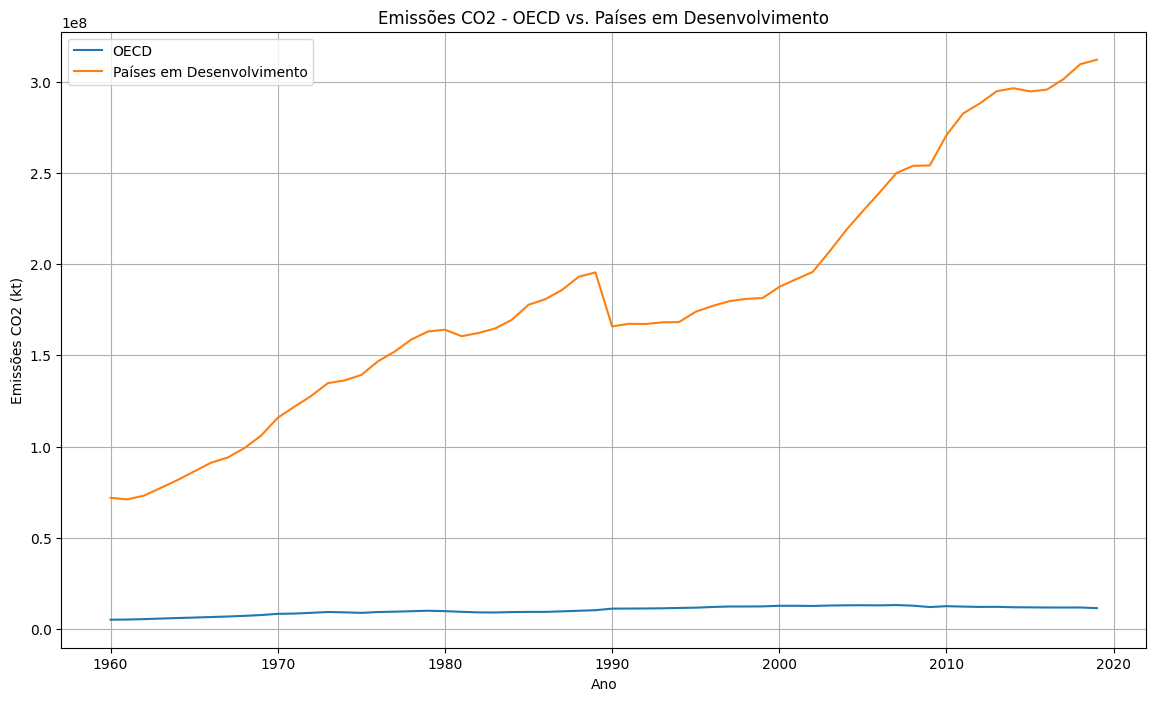

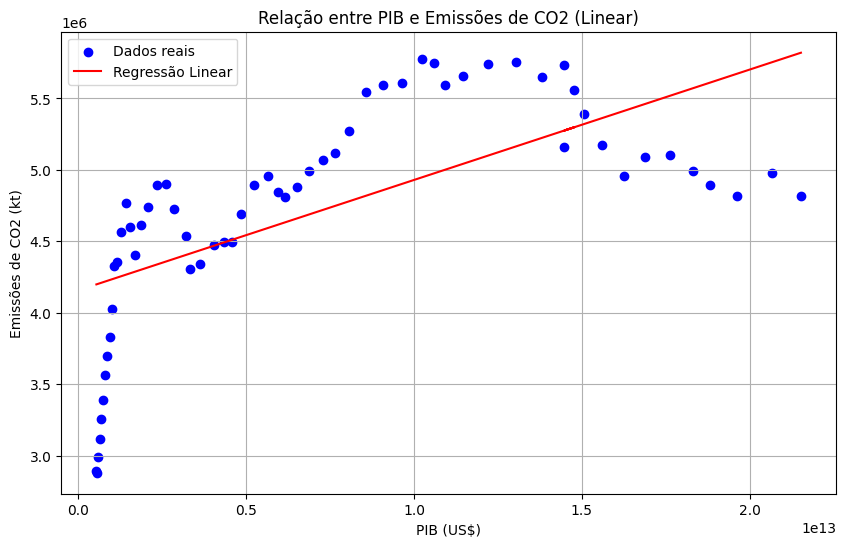

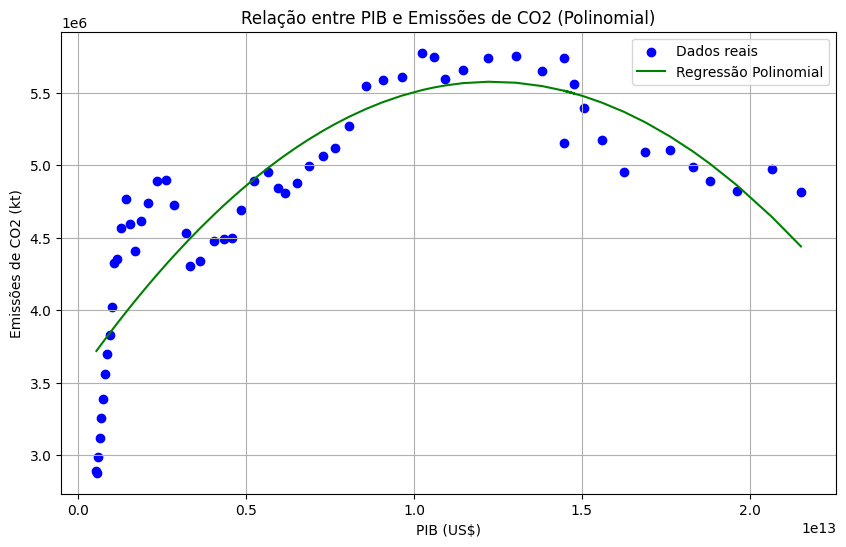

In [21]:
# --- 1. Explorar os dados da API do World Bank ---

# URL base da API
base_url = "http://api.worldbank.org/v2/"

# Obter a lista de indicadores disponíveis
try:
    response = requests.get(base_url + "indicators?per_page=1000&format=json")  # Limitei a 1000 para não demorar o carregamento
    response.raise_for_status()  # Verificar se a requisição foi bem-sucedida
    indicators_data = response.json()

    # Extrair informações relevantes (nome e descrição do indicador)
    indicators = []
    for page in range(1, indicators_data[0]['pages'] + 1):
        response = requests.get(base_url + f"indicators?per_page=1000&page={page}&format=json")
        indicators.extend([{
            "id": indicator['id'],
            "name": indicator['name'],
            "source": indicator['source']['value']
        } for indicator in response.json()[1]])

    indicators_df = pd.DataFrame(indicators)
    indicators_df.to_csv("world_bank_indicators.csv", index=False)

except requests.exceptions.RequestException as e:
    print(f"Erro na requisição à API: {e}")

# --- 2. Carregar os dados de emissões de CO2 (do seu CSV) ---
co2_emissions = pd.read_csv("co2_emissions_kt_by_country.csv")

# Filtrar para os EUA
us_emissions = co2_emissions[co2_emissions['country_code'] == 'USA']

# --- 3. Obter dados do World Bank (PIB dos EUA) ---
indicator_id = "NY.GDP.MKTP.CD"  # PIB em dólares americanos
country_code = "US"
try:
    response_pib = requests.get(f"{base_url}countries/{country_code}/indicators/{indicator_id}?per_page=100&format=json")
    response_pib.raise_for_status()

    gdp_data = response_pib.json()[1]
    gdp_usa = [{'year': int(item['date']), 'gdp': item['value']} for item in gdp_data if item['value'] is not None]

    gdp_df = pd.DataFrame(gdp_usa)

except requests.exceptions.RequestException as e:
    print(f"Erro na requisição à API: {e}")

# --- 4. Combinar os dados e criar o gráfico ---

# Combinar os dados de emissões de CO2 e PIB
merged_df = pd.merge(us_emissions, gdp_df, on='year', how='inner')
merged_df = merged_df.rename(columns={'value': 'CO2 Emissions (kt)'})

# Criar o gráfico de comparação
fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_df['year'], y=merged_df['CO2 Emissions (kt)'],
                    mode='lines+markers',
                    name='Emissões de CO2 (kt)'))
fig.add_trace(go.Scatter(x=merged_df['year'], y=merged_df['gdp'],
                    mode='lines+markers',
                    name='PIB (US$)'))
fig.update_layout(title='Emissões de CO2 e PIB - EUA (1960-2018)',
                   xaxis_title='Ano',
                   yaxis_title='Valores')
fig.show()

# --- 5. Comparar OCDE vs. Países em Desenvolvimento ---

# Lista de países da OCDE
oecd_countries = ['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'LUX', 'LVA', 'MEX', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'TUR', 'USA'] 

# Filtrar os dados para países em desenvolvimento (não OCDE)
developing_countries_filter = ~co2_emissions['country_code'].isin(oecd_countries)
developing_countries = co2_emissions[developing_countries_filter]

# Emissões para países OCDE
oecd_emissions = co2_emissions[co2_emissions['country_code'].isin(oecd_countries)].groupby('year')['value'].sum().reset_index()

# Emissões para países em desenvolvimento
developing_emissions = developing_countries.groupby('year')['value'].sum().reset_index()

# Plotar as comparações de emissões
plt.figure(figsize=(14, 8))

plt.plot(oecd_emissions['year'], oecd_emissions['value'], label='OECD')
plt.plot(developing_emissions['year'], developing_emissions['value'], label='Países em Desenvolvimento')

plt.xlabel('Ano')
plt.ylabel('Emissões CO2 (kt)')
plt.title('Emissões CO2 - OECD vs. Países em Desenvolvimento')
plt.grid(True)
plt.legend()
plt.show()

# --- 6. Modelo de Regressão Linear para Análise de Dados --- 

# Regressão Linear Simples
X = merged_df[['gdp']]  # Variável independente: PIB
y = merged_df['CO2 Emissions (kt)']  # Variável dependente: Emissões de CO2

# Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)

# Gráfico de regressão linear
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Dados reais', color='blue')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.xlabel('PIB (US$)')
plt.ylabel('Emissões de CO2 (kt)')
plt.title('Relação entre PIB e Emissões de CO2 (Linear)')
plt.legend()
plt.grid(True)
plt.show()

# Se desejar usar um modelo polinomial, você pode aplicar o PolynomialFeatures da seguinte maneira:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Regressão polinomial
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)

# Gráfico de regressão polinomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Dados reais', color='blue')
plt.plot(X, y_poly_pred, color='green', label='Regressão Polinomial')
plt.xlabel('PIB (US$)')
plt.ylabel('Emissões de CO2 (kt)')
plt.title('Relação entre PIB e Emissões de CO2 (Polinomial)')
plt.legend()
plt.grid(True)
plt.show()


## Análise dos Gráficos e Tendências

- **Gráfico de Comparação de Emissões de CO2 e PIB**: Este gráfico permite visualizar como as **emissões de CO2** e o **PIB** evoluíram ao longo do tempo para os EUA. Ao analisar a evolução desses dois indicadores simultaneamente, podemos verificar se há uma correlação direta entre o crescimento econômico e o aumento das emissões de CO2. Se houver uma correlação positiva, isso indicaria que o crescimento econômico pode estar contribuindo para o aumento das emissões de CO2, o que pode ter implicações para as políticas de desenvolvimento sustentável.

- **Comparação de Emissões de CO2 entre OCDE e Países em Desenvolvimento**: A comparação entre as emissões de CO2 de países da **OCDE** e **países em desenvolvimento** revela diferenças significativas. É possível observar se os países desenvolvidos têm uma **maior intensidade de emissões**, devido ao maior nível de industrialização, ou se os países em desenvolvimento estão alcançando níveis semelhantes à medida que suas economias crescem. Esse gráfico pode revelar padrões importantes que ajudam a entender as relações entre **desenvolvimento econômico** e **emissões de CO2**.

- **Modelos de Regressão (Linear e Polinomial)**: A análise dos **modelos de regressão** ajuda a avaliar a relação estatística entre as variáveis. A **regressão linear** mostrará uma relação direta entre o **PIB** e as **emissões de CO2**, enquanto a **regressão polinomial** pode identificar padrões mais complexos. A comparação desses modelos ajuda a verificar qual tipo de relação existe entre essas variáveis e se a evolução das emissões de CO2 está, de fato, associada ao crescimento econômico.

---

# Conclusões Finais e a análise da Pegada de Carbono e Desenvolvimento Econômico

Este notebook investiga a pegada de carbono de diferentes países, com foco principal no Brasil e EUA, correlacionando-a com indicadores econômicos e demográficos, como PIB e crescimento populacional.  Utilizando datasets sobre emissões de CO2, população e PIB, aliados a dados da API do Banco Mundial, o estudo busca responder perguntas sobre tendências, comparações regionais e a influência de fatores socioeconômicos nas emissões.

## Principais Resultados

**1. Tendências Históricas:** O Brasil apresentou emissões abaixo da média global, com crescimento moderado. Políticas climáticas em anos-chave coincidiram com estabilização ou quedas nas emissões. Os EUA, por outro lado, mantiveram emissões altas, com estabilização e leve declínio após 2005.

**2. Impacto Setorial:** Setores como eletricidade, aviação e transporte rodoviário foram grandes contribuidores para as emissões, destacando a necessidade de mitigação direcionada.

**3. Simulações e Cenários de Redução:** Simulações indicaram que reduções de até 20% em setores-chave poderiam diminuir significativamente as emissões globais.

**4. Conexões e Interdependências:**  A análise revelou conexões entre modais de transporte e suas influências nas emissões, com interdependências entre setores.

**5. Abordagem de Visualização:**  Heatmaps, gráficos de área e redes forneceram uma compreensão clara das dinâmicas das emissões. A API Carbonext complementou os dados históricos com uma perspectiva atualizada.


## Resumo das Perguntas e Análises

A análise temporal das emissões de CO2 (1960-2021) revelou um aumento global consistente, com os EUA apresentando níveis muito superiores aos do Brasil. A correlação entre variação do PIB, crescimento populacional e emissões de CO2 variou entre os países, sendo mais forte para o Brasil. Comparativamente, o Brasil emitiu menos CO2 que a média global, América do Norte e OCDE (1990-2021), alinhando-se à média latino-americana.  A relação entre variação anual do PIB e das emissões de CO2 foi fraca, tanto globalmente quanto por grupo de renda. Similarmente, o crescimento populacional teve correlação fraca com as emissões per capita.  Uma análise com árvore de decisão classificou o crescimento das emissões globais como exponencial, principalmente após 1980. China, EUA e Índia lideraram os aumentos de emissões, enquanto Venezuela e Ucrânia, e países pós-soviéticos, apresentaram quedas significativas. A Ásia e a América do Norte foram as maiores contribuintes para a variação total de emissões.  Foi realizada uma classificação dos países por impacto ambiental com base nas emissões de CO2 per capita, visualizando a evolução temporal e a relação com o PIB por região.


## Aplicações Práticas e Futuros Caminhos

Este estudo demonstra o valor de análises integradas para entender a complexa relação entre emissões de CO2, economia e demografia. As descobertas podem direcionar políticas públicas de mitigação, priorizando setores com maior impacto e considerando as particularidades regionais e de renda. A integração com APIs de dados, como a do Banco Mundial, é crucial para enriquecer as análises e obter informações atualizadas. Modelos preditivos podem ser aprimorados incorporando variáveis como uso de energias renováveis e eficiência energética.  A replicação desta abordagem em outros contextos geográficos e a inclusão de outras variáveis socioeconômicas são direções promissoras para pesquisas futuras, contribuindo para um desenvolvimento mais sustentável.

---

## Referências

1. [CO2 Emissions dataset][co2-dataset]
2. [GPD(PIB) dataset][pib-dataset]
3. [World Population dataset][pop-dataset]
4. [API Banco Mundial][api-banco-mundial]


[co2-dataset]: https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country/data
[pib-dataset]: https://www.kaggle.com/datasets/fredericksalazar/pib-gdp-global-by-countries-since-1960-to-2021?select=countries_gdp_hist.csv
[pop-dataset]: https://www.kaggle.com/datasets/imdevskp/world-population-19602018?select=population_total_long.csv
[api-banco-mundial]: https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structures